In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
def load_data(path):
    df = pd.read_csv(path)
    
    # Define the columns you are interested in
    numeric_columns = ['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge', 
                       'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    
    # Replace specific string errors with NaN
    df.replace({'Bad': np.nan, 'Tag not found': np.nan, '0': np.nan}, inplace=True)
    
    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date']) 
    
    # Convert numeric columns to numeric types, coercing errors
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Drop rows where all specified columns are NaN
    df.dropna(subset=numeric_columns, how='all', inplace=True)
    
    # Output the data types and shape of the dataframe
    print(df.dtypes)
    print(df.shape)
    
    # Save the cleaned data
    df.to_csv('/Users/rianrachmanto/pypro/data/formated_esp_data.csv', index=False)
    
    return df


In [188]:
path='/Users/rianrachmanto/pypro/data/data_esp.csv'
df=load_data(path)

Well_ID                       object
Date                  datetime64[ns]
Frequency                    float64
Voltage                      float64
Ampere                       float64
Pressure_Discharge           float64
Pressure_Intake              float64
Temp_Intake                  float64
Temp_Motor                   float64
Vibration_X                  float64
Vibration_Y                  float64
dtype: object
(217306, 11)


In [189]:
def viz_data(df):
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge',
                        'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    #plotting histogram for numeric columns, one plot for each column
    for col in numeric_columns:
        plt.figure()
        sns.histplot(df[col],kde=True)
        plt.title(col)
        plt.show()

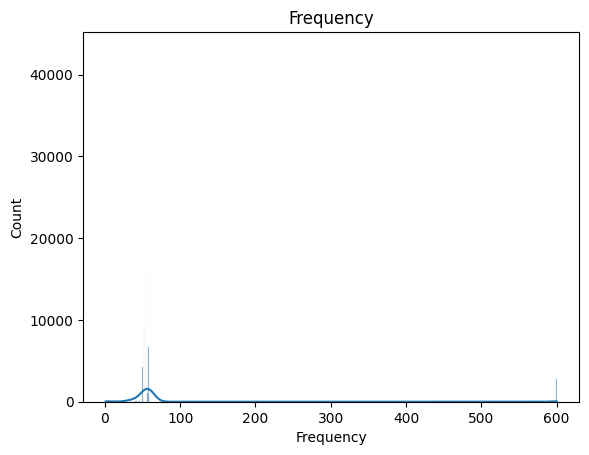

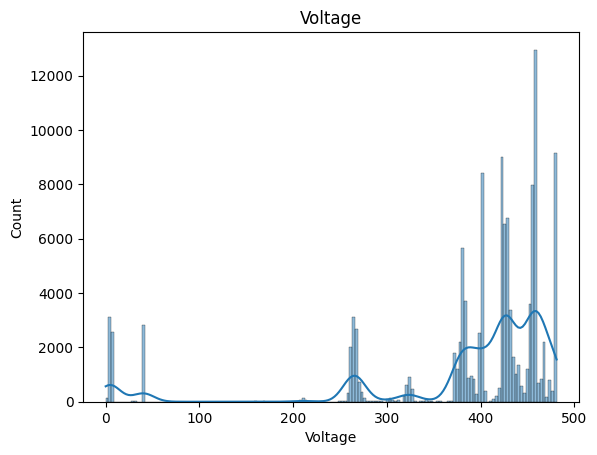

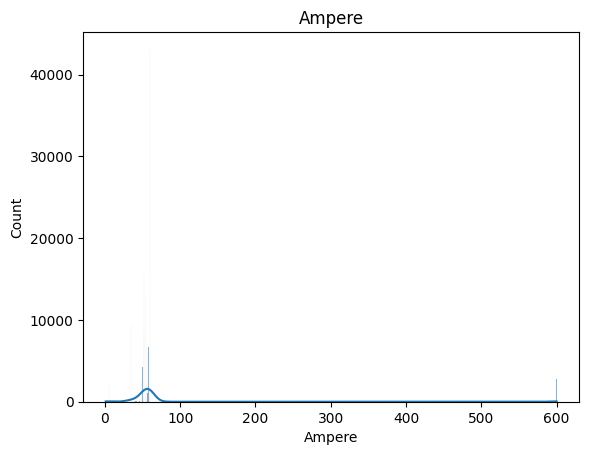

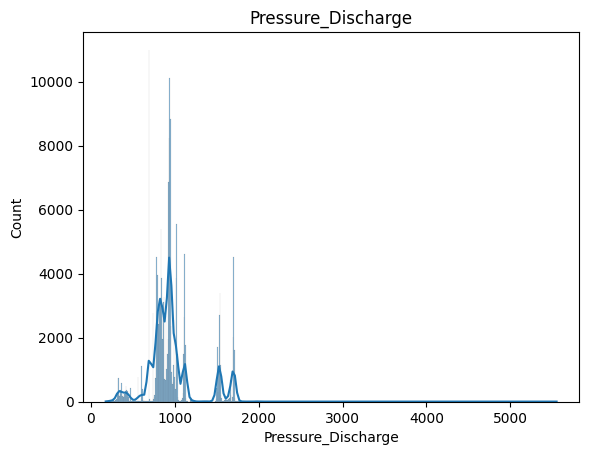

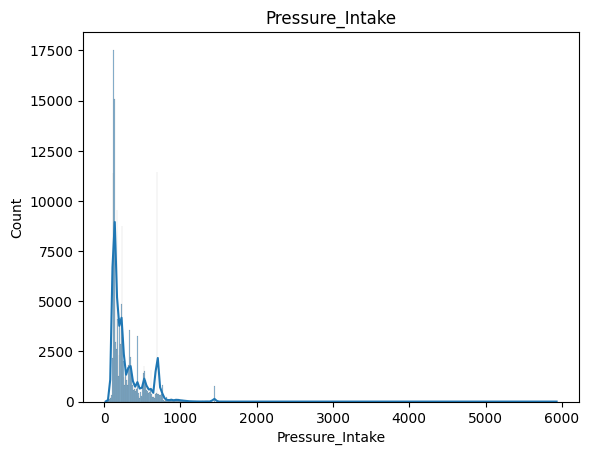

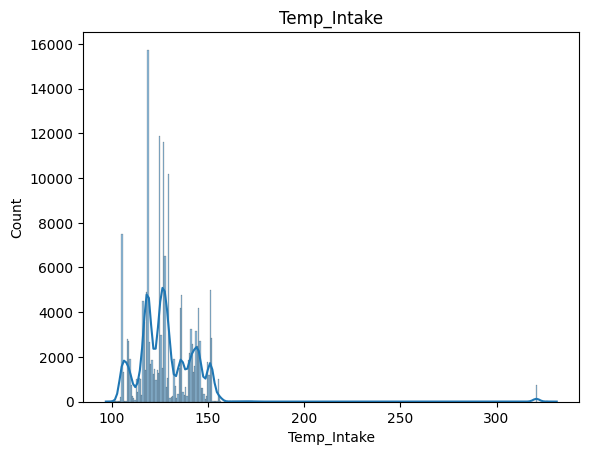

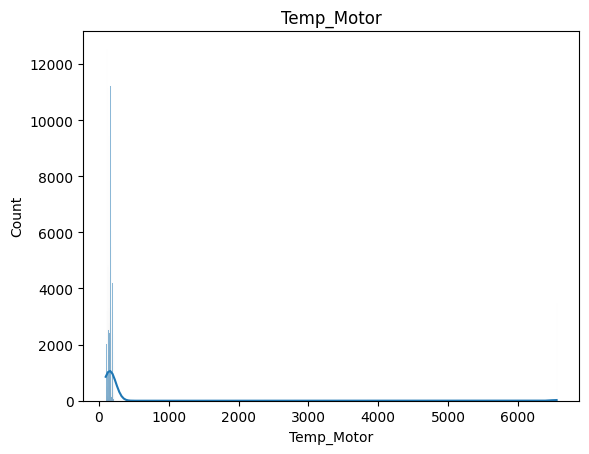

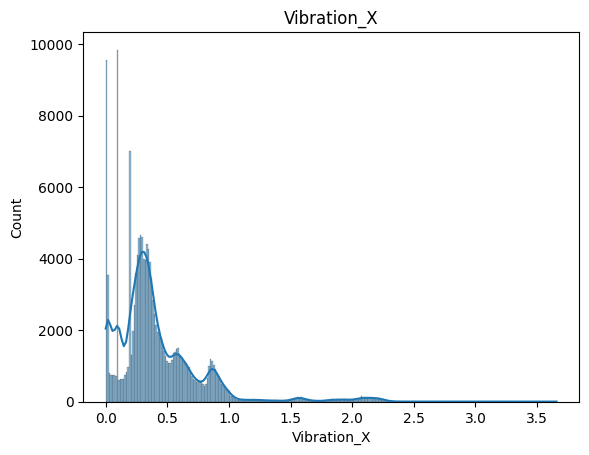

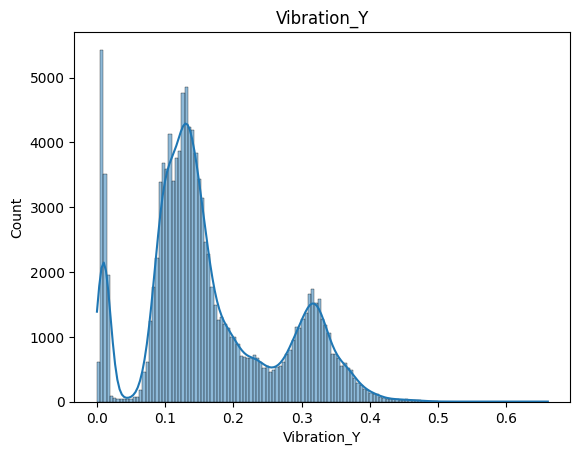

In [190]:
viz_data(df)

In [191]:

def fill_missing(df):
    mean_col=['Pressure_Discharge','Temp_Intake']
    median_col=['Frequency', 'Voltage', 'Ampere', 'Pressure_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    for col in mean_col:
        df[col].fillna(df[col].mean(),inplace=True)
    for col in median_col:
        df[col].fillna(df[col].median(),inplace=True)
    print ('Missing values after filling: ',df.isnull().sum().sum())
    return df


In [192]:
df2=fill_missing(df)

Missing values after filling:  0


In [193]:
'''
def dropmissing(df):
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge', 
                      'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    df.dropna(inplace=True)
    print('Missing values after dropping: ',df.isnull().sum().sum())
    #remove all the values that are zeros
    df=df[(df[numeric_columns]!=0).all(axis=1)]
    return df
'''

"\ndef dropmissing(df):\n    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge', \n                      'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']\n    df.dropna(inplace=True)\n    print('Missing values after dropping: ',df.isnull().sum().sum())\n    #remove all the values that are zeros\n    df=df[(df[numeric_columns]!=0).all(axis=1)]\n    return df\n"

In [194]:
#df2=dropmissing(df)

In [195]:
dict_data_tab0 = {
    'BC1': 'BC1', 'BS3': 'BS3', 'YNA7': 'YNA7', 'YNB8': 'YNB8', 'YNB17': 'YNB17', 'YNB28': 'YNB28',
    'YNB24': 'YNB24', 'YNC10': 'YNC10', 'YNC12': 'YNC12', 'YCA5': 'YCA5', 'YCA10': 'YCA10',
    'YCA7': 'YCA7', 'YCA8': 'YCA8', 'YNB29': 'YNB29', 'YNB30': 'YNB30', 'YCB4': 'YCB4',
    'YNB23': 'YNB23', 'YNB19': 'YNB19', 'YWB15': 'YWB15', 'YWA20': 'YWA20', 'YWA21': 'YWA21',
    'YWA23': 'YWA23', 'YWB22': 'YWB22', 'YWB19': 'YWB19', 'YCA11': 'YCA11', 'YWB14': 'YWB14',
    'YWB17': 'YWB17', 'YWB12': 'YWB12'
}

In [196]:
#plot each well_id in dict_data_tab0 where the plot is Voltage in time series
def plot_voltage(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Voltage')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

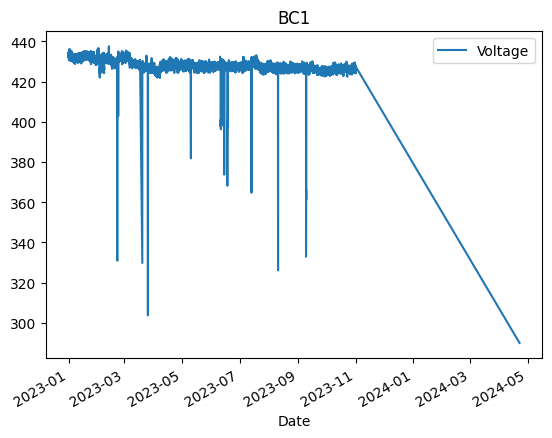

<Figure size 640x480 with 0 Axes>

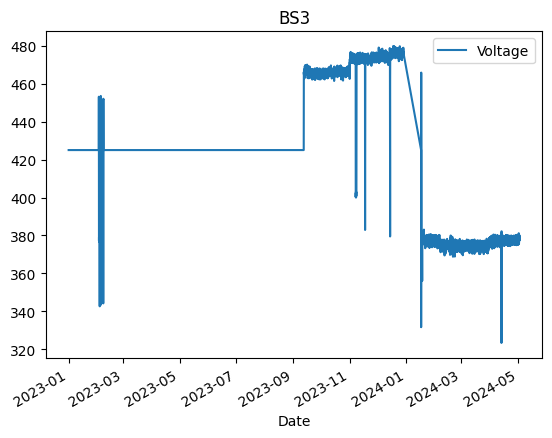

<Figure size 640x480 with 0 Axes>

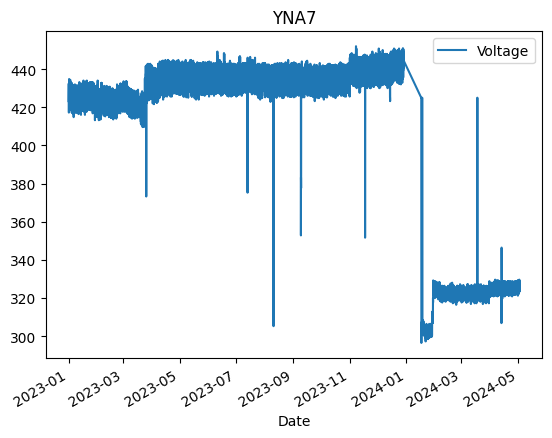

<Figure size 640x480 with 0 Axes>

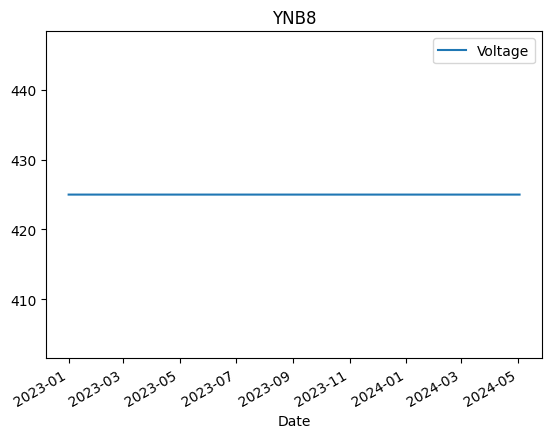

<Figure size 640x480 with 0 Axes>

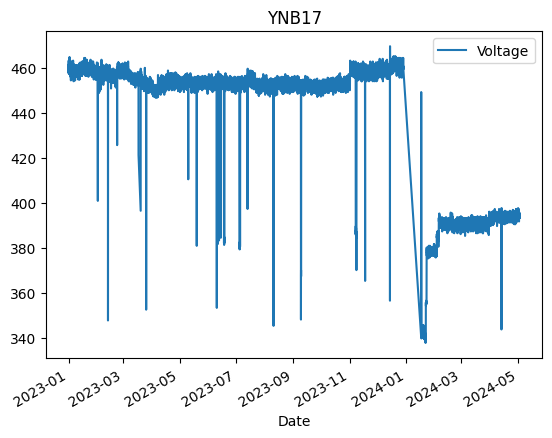

<Figure size 640x480 with 0 Axes>

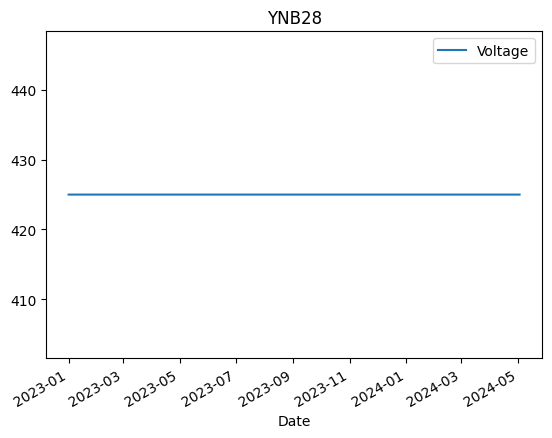

<Figure size 640x480 with 0 Axes>

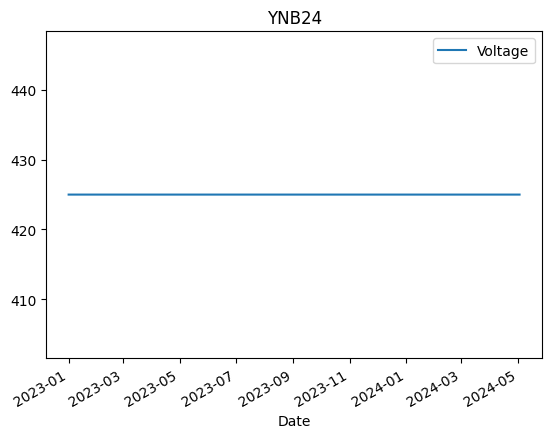

<Figure size 640x480 with 0 Axes>

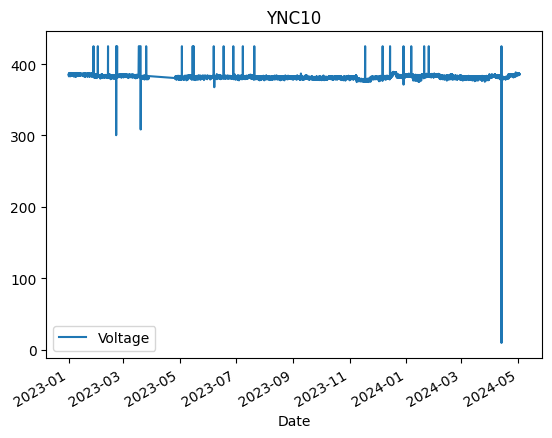

<Figure size 640x480 with 0 Axes>

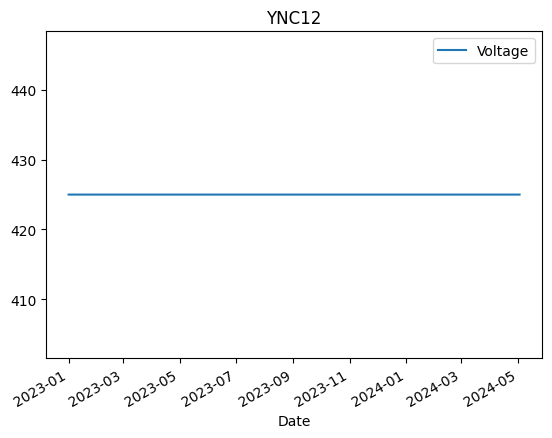

<Figure size 640x480 with 0 Axes>

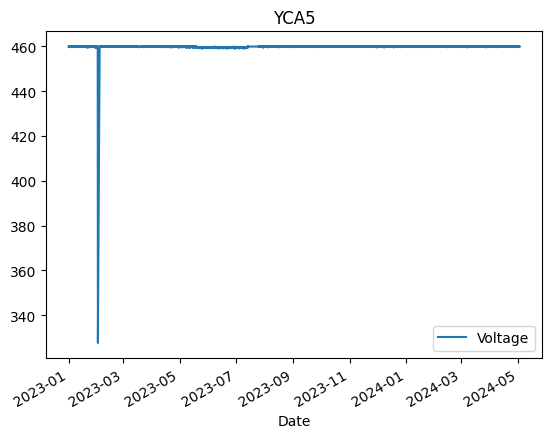

<Figure size 640x480 with 0 Axes>

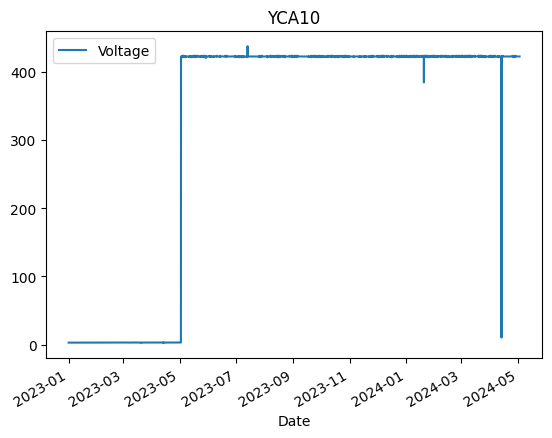

<Figure size 640x480 with 0 Axes>

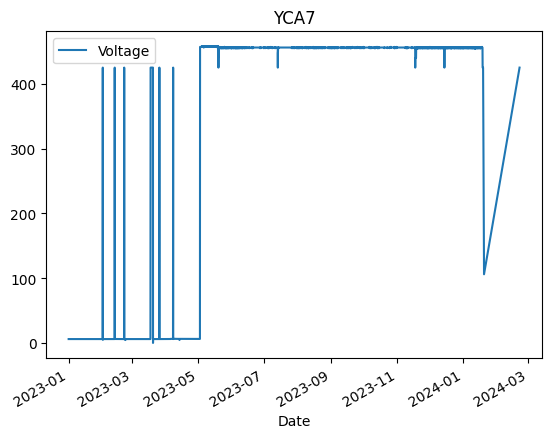

<Figure size 640x480 with 0 Axes>

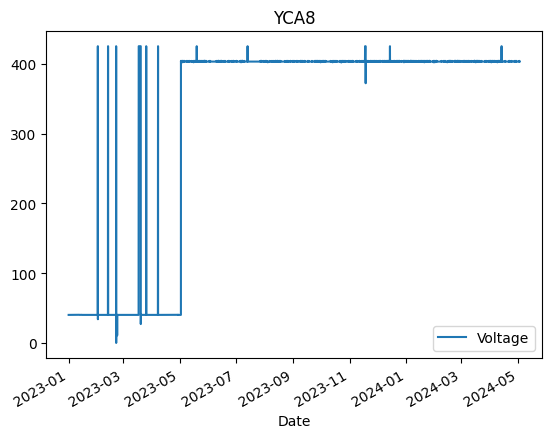

<Figure size 640x480 with 0 Axes>

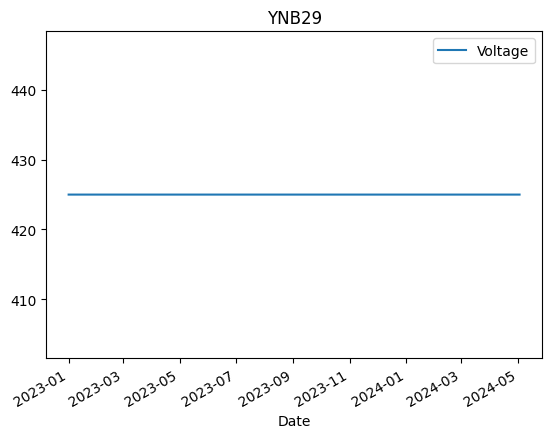

<Figure size 640x480 with 0 Axes>

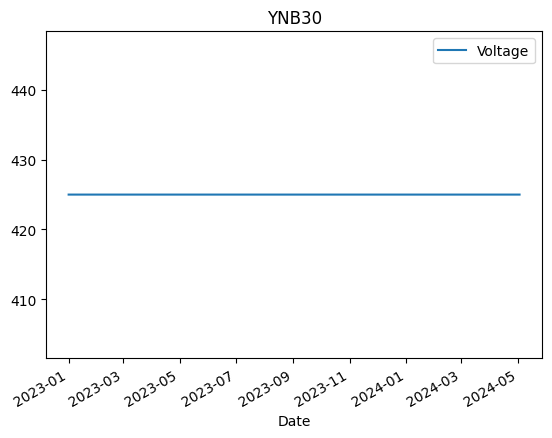

<Figure size 640x480 with 0 Axes>

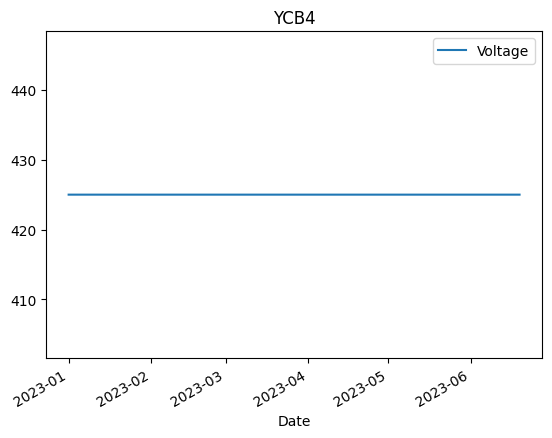

<Figure size 640x480 with 0 Axes>

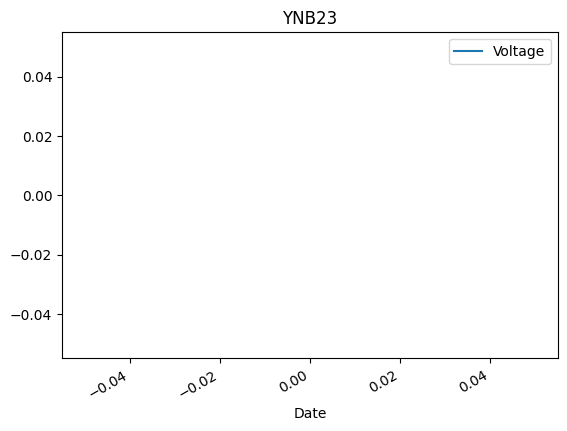

<Figure size 640x480 with 0 Axes>

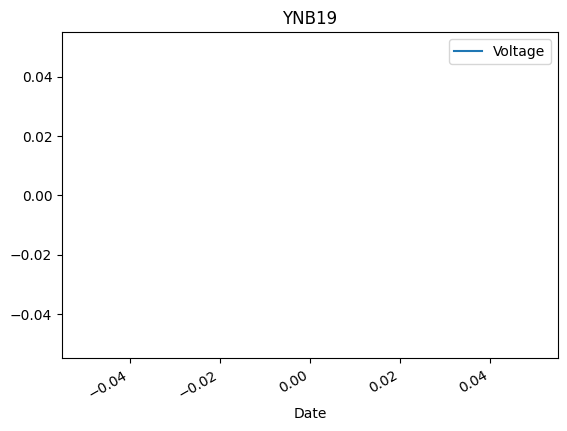

<Figure size 640x480 with 0 Axes>

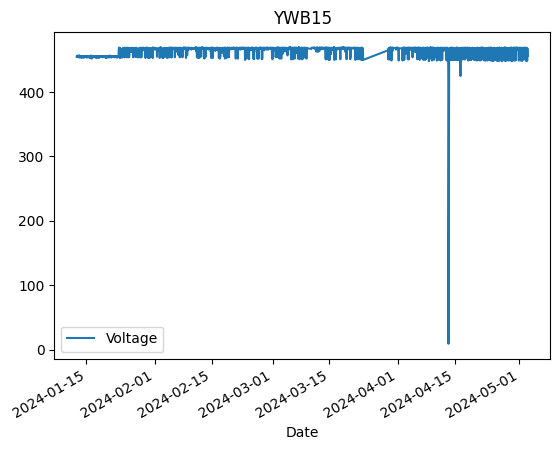

<Figure size 640x480 with 0 Axes>

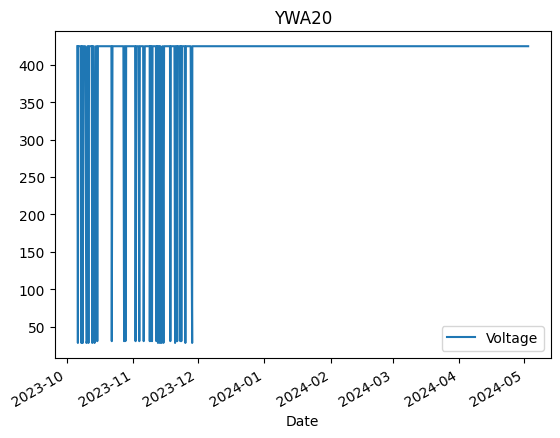

<Figure size 640x480 with 0 Axes>

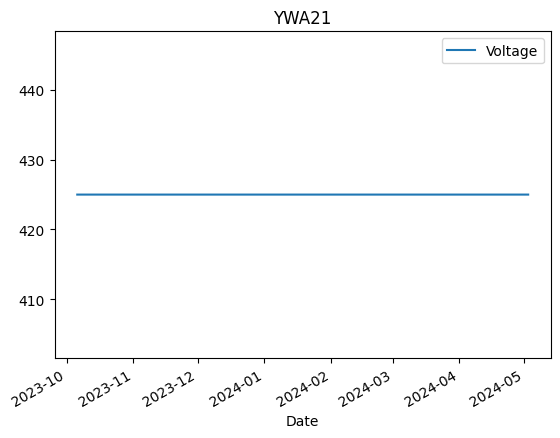

<Figure size 640x480 with 0 Axes>

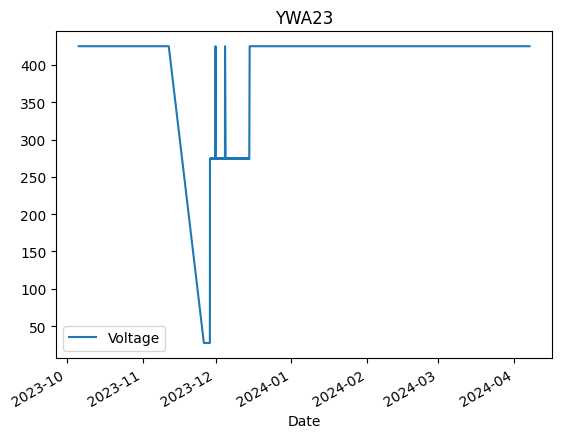

<Figure size 640x480 with 0 Axes>

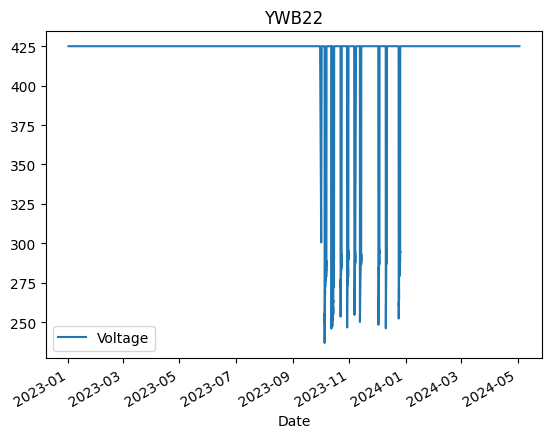

<Figure size 640x480 with 0 Axes>

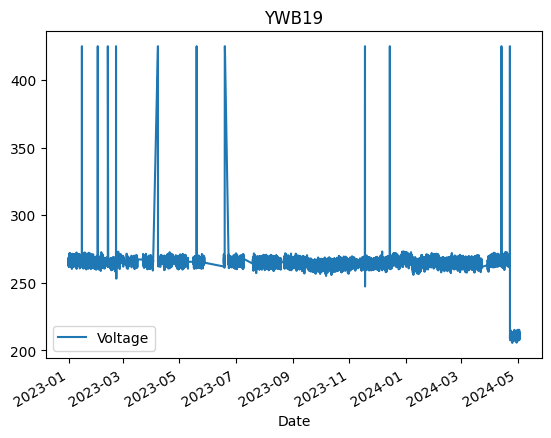

<Figure size 640x480 with 0 Axes>

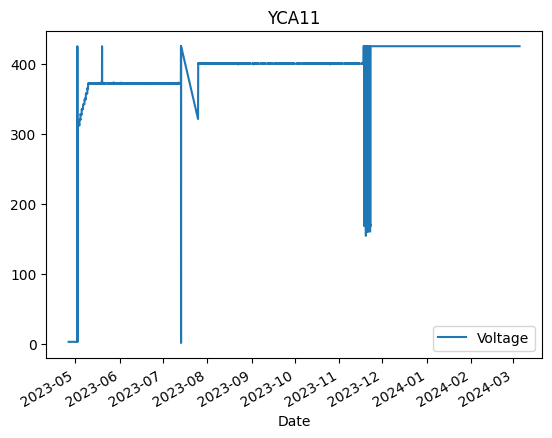

<Figure size 640x480 with 0 Axes>

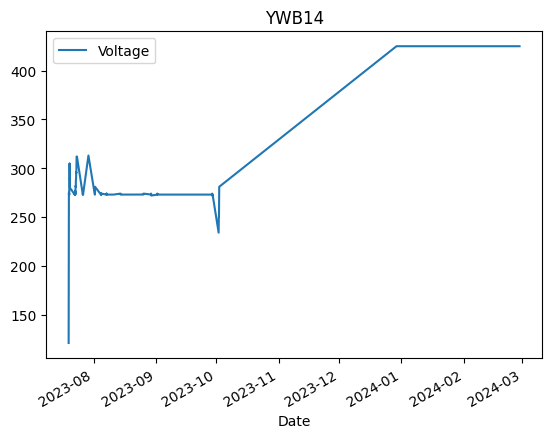

<Figure size 640x480 with 0 Axes>

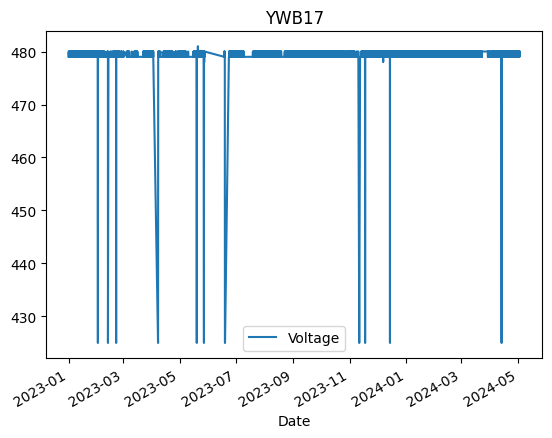

<Figure size 640x480 with 0 Axes>

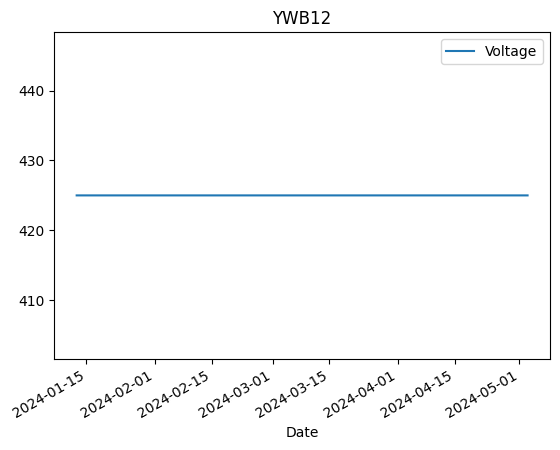

In [197]:
plot_voltage(df2,dict_data_tab0)

In [198]:
def plot_pressure_intake(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Pressure_Intake')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

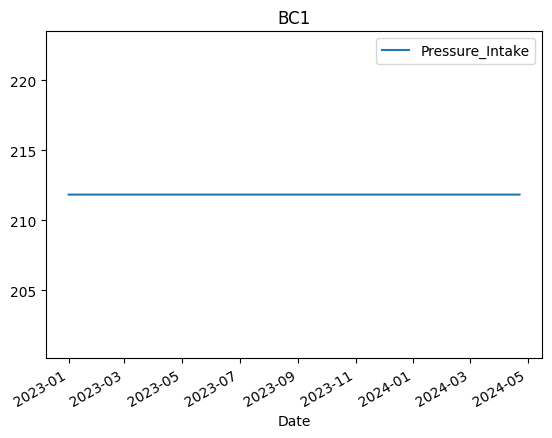

<Figure size 640x480 with 0 Axes>

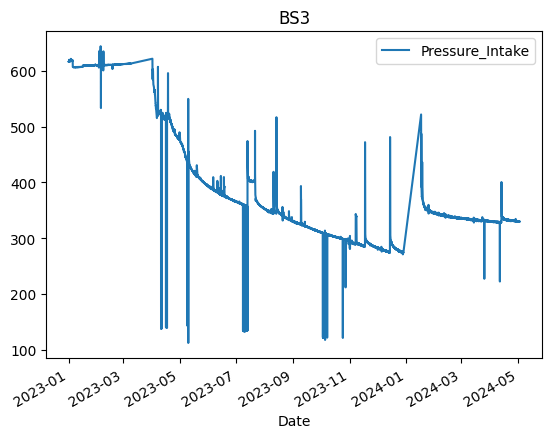

<Figure size 640x480 with 0 Axes>

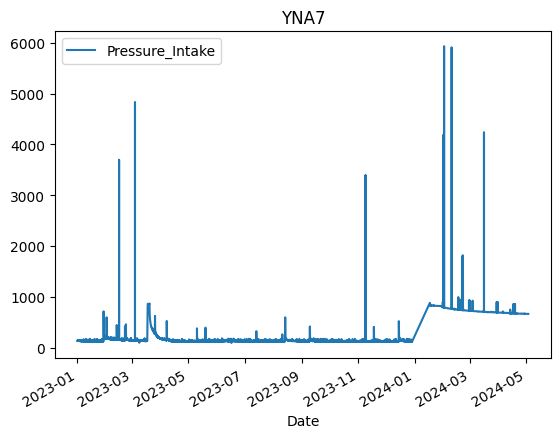

<Figure size 640x480 with 0 Axes>

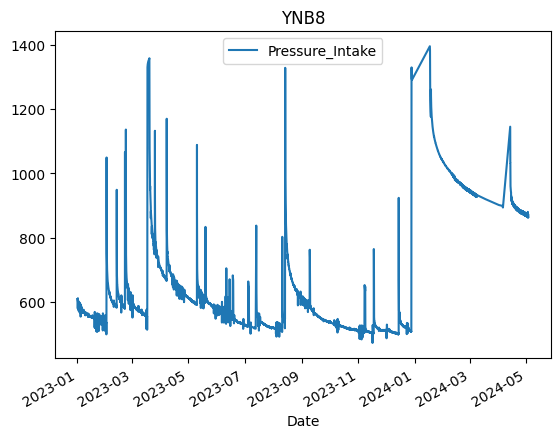

<Figure size 640x480 with 0 Axes>

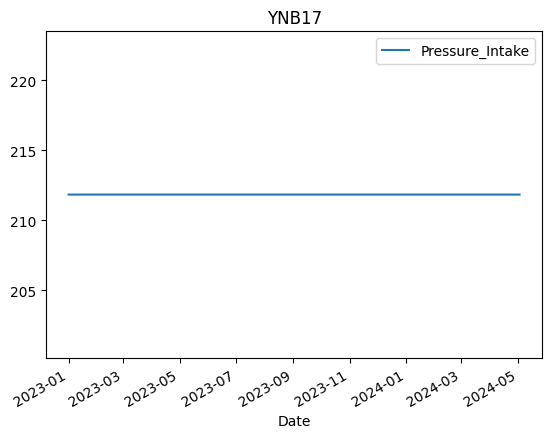

<Figure size 640x480 with 0 Axes>

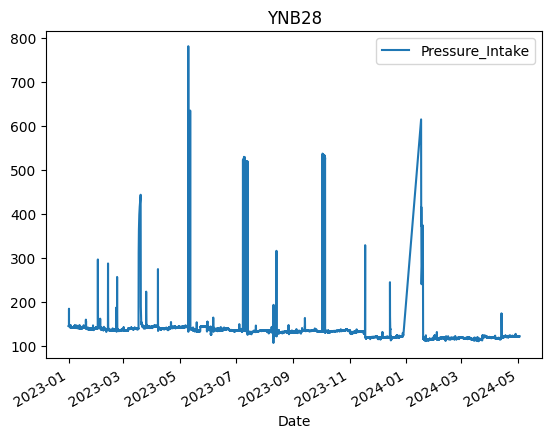

<Figure size 640x480 with 0 Axes>

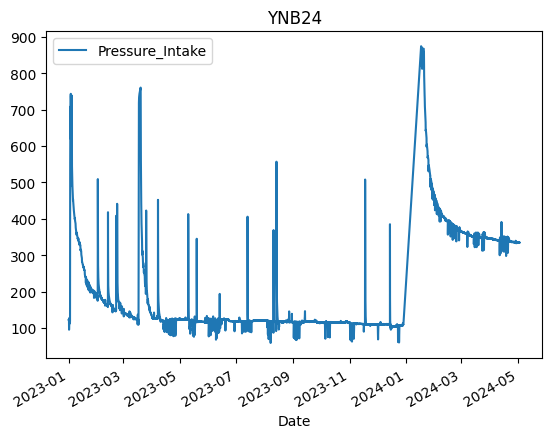

<Figure size 640x480 with 0 Axes>

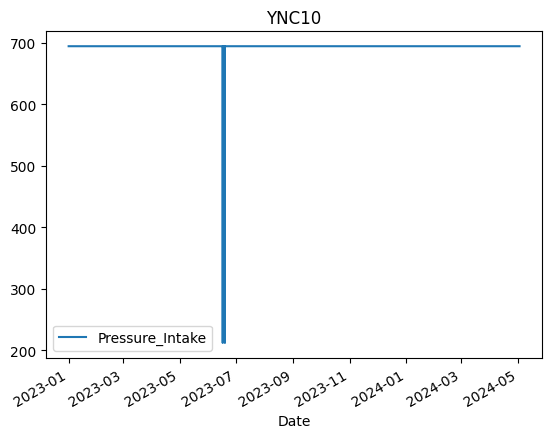

<Figure size 640x480 with 0 Axes>

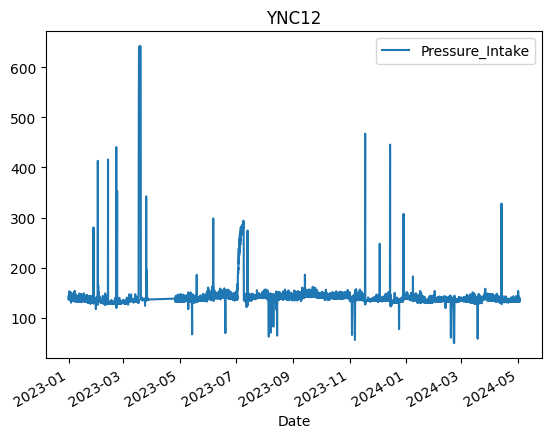

<Figure size 640x480 with 0 Axes>

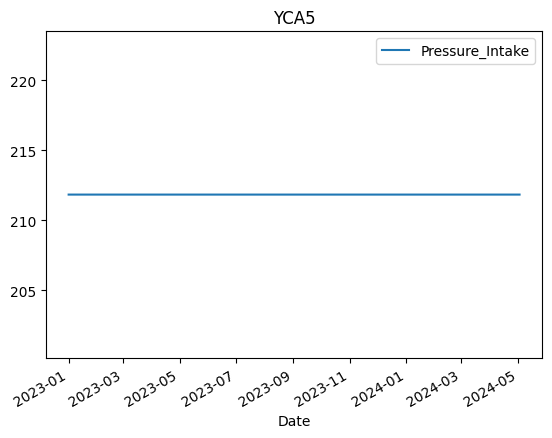

<Figure size 640x480 with 0 Axes>

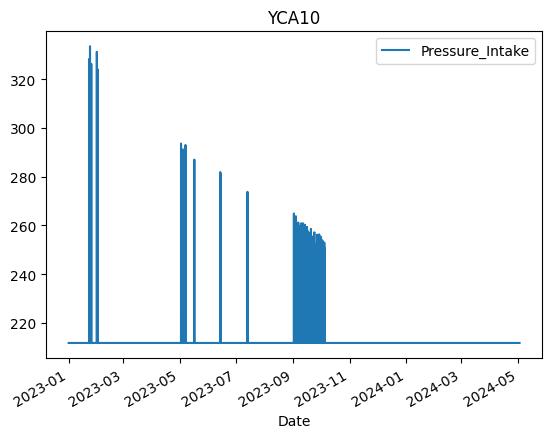

<Figure size 640x480 with 0 Axes>

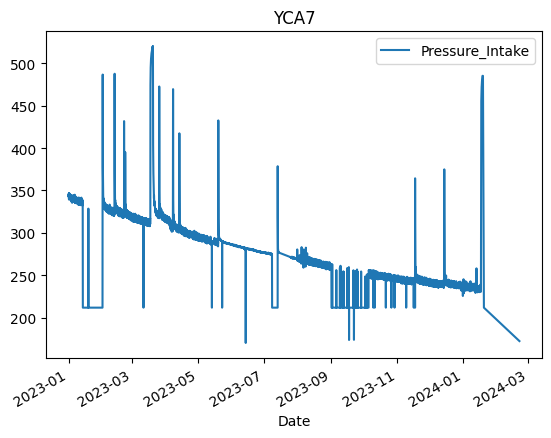

<Figure size 640x480 with 0 Axes>

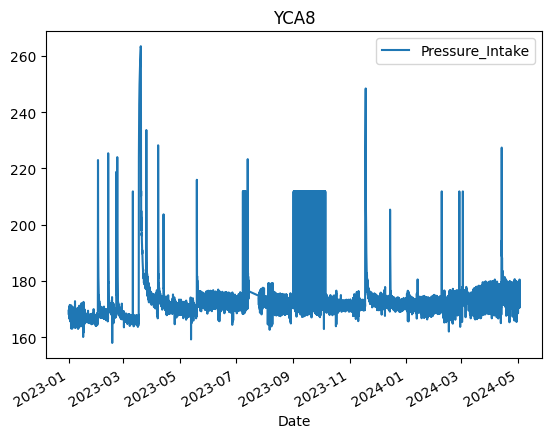

<Figure size 640x480 with 0 Axes>

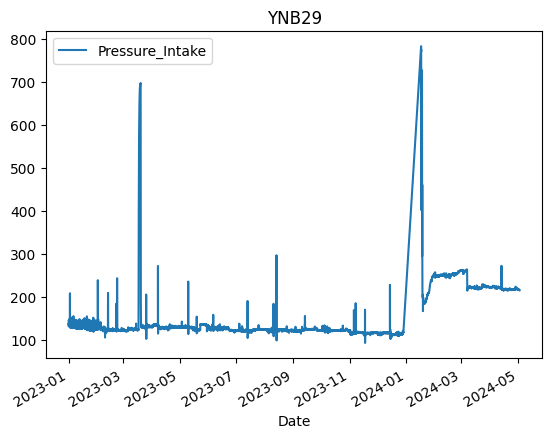

<Figure size 640x480 with 0 Axes>

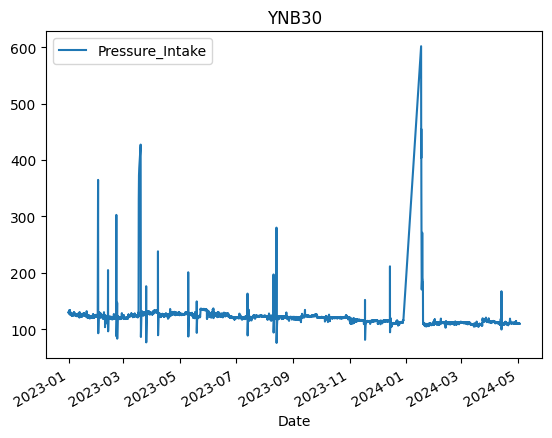

<Figure size 640x480 with 0 Axes>

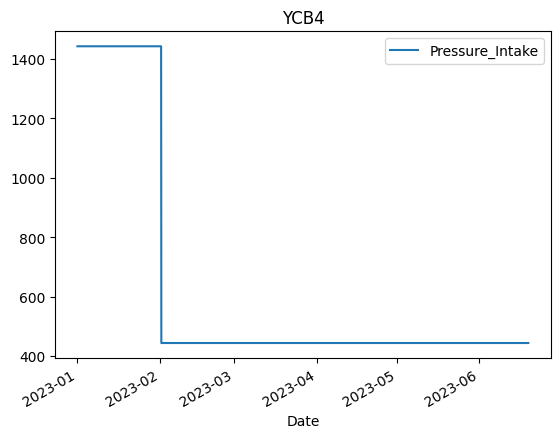

<Figure size 640x480 with 0 Axes>

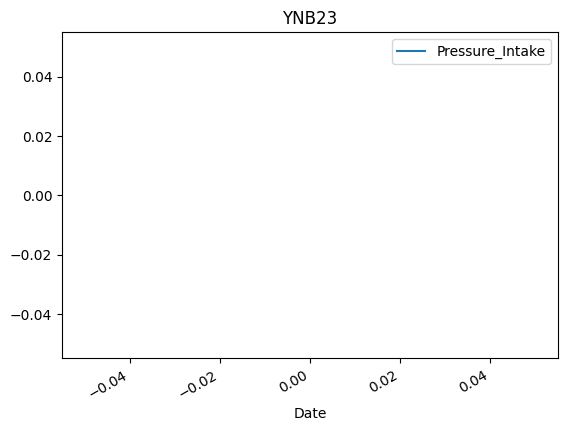

<Figure size 640x480 with 0 Axes>

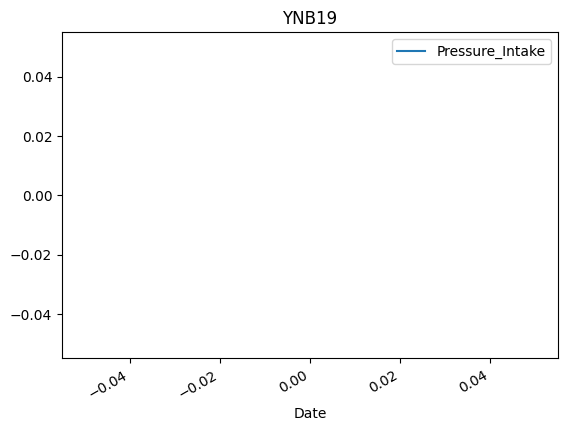

<Figure size 640x480 with 0 Axes>

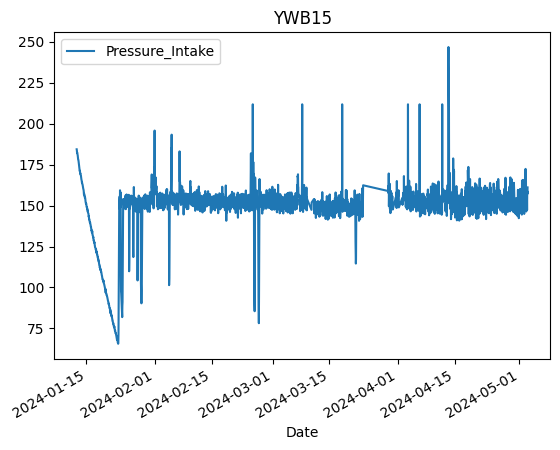

<Figure size 640x480 with 0 Axes>

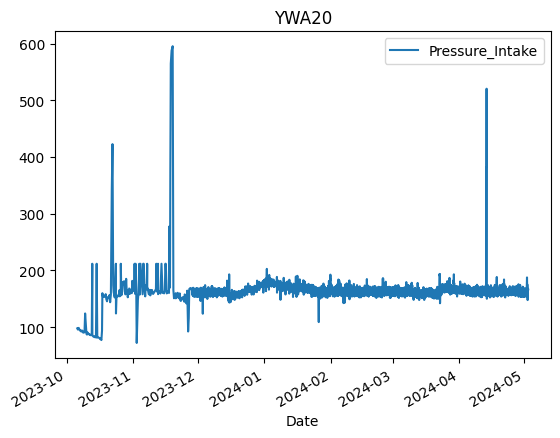

<Figure size 640x480 with 0 Axes>

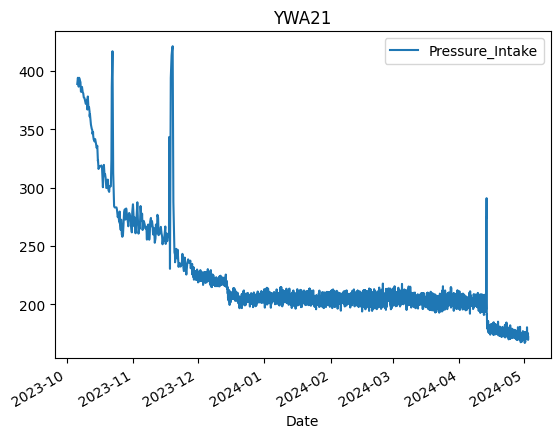

<Figure size 640x480 with 0 Axes>

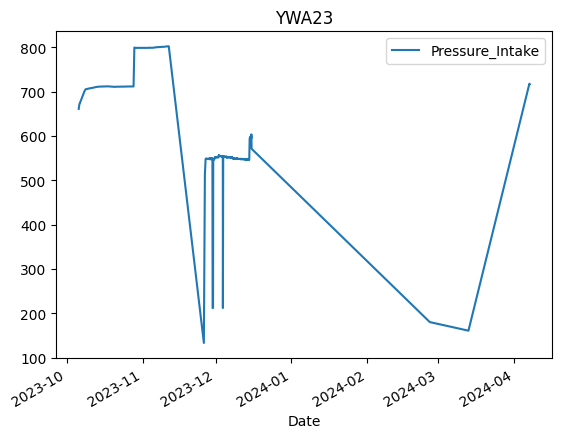

<Figure size 640x480 with 0 Axes>

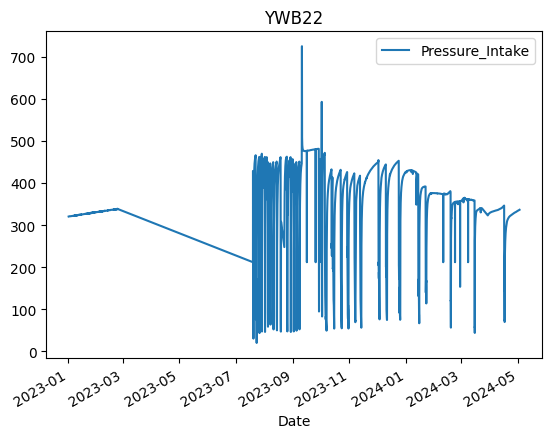

<Figure size 640x480 with 0 Axes>

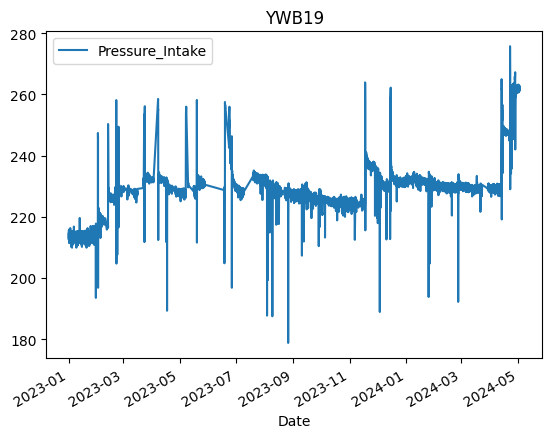

<Figure size 640x480 with 0 Axes>

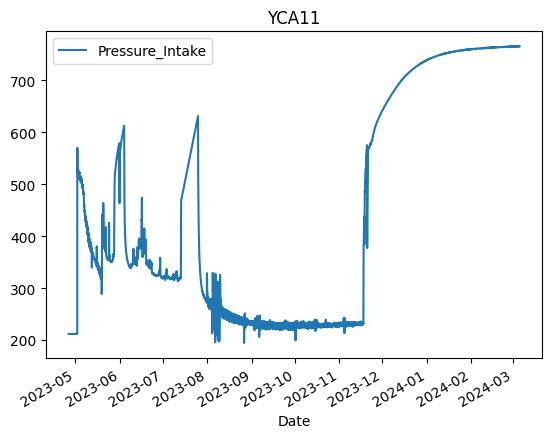

<Figure size 640x480 with 0 Axes>

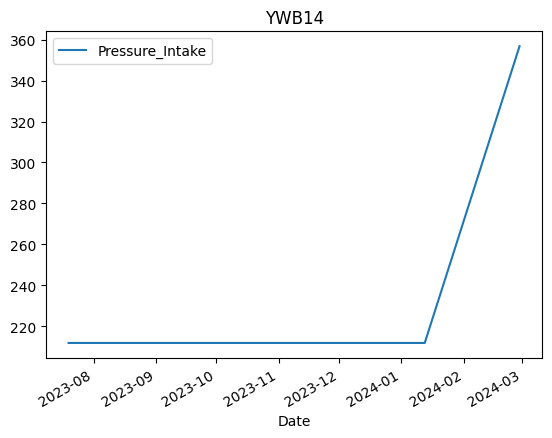

<Figure size 640x480 with 0 Axes>

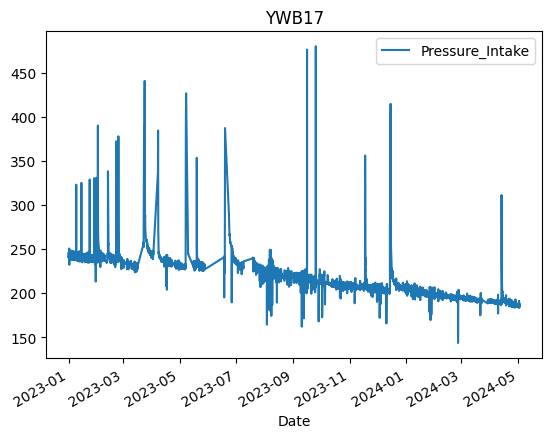

<Figure size 640x480 with 0 Axes>

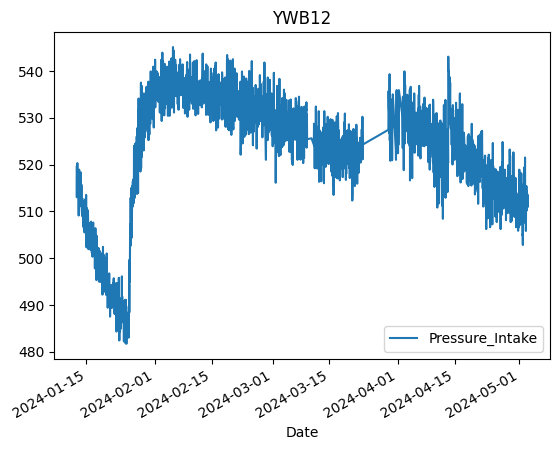

In [199]:
plot_pressure_intake(df2,dict_data_tab0)

In [200]:
def plot_pressure_discharge(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Pressure_Discharge')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

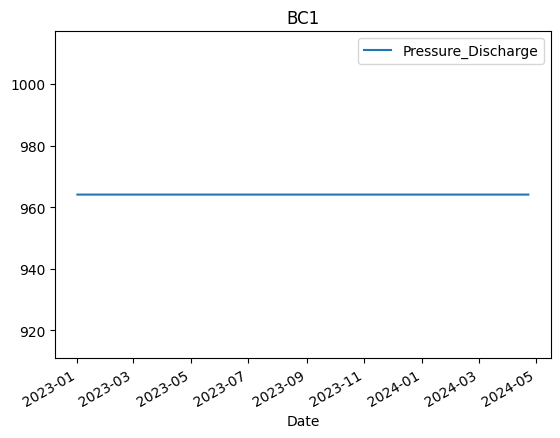

<Figure size 640x480 with 0 Axes>

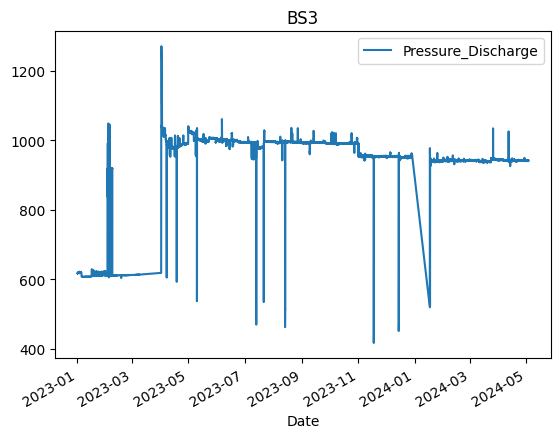

<Figure size 640x480 with 0 Axes>

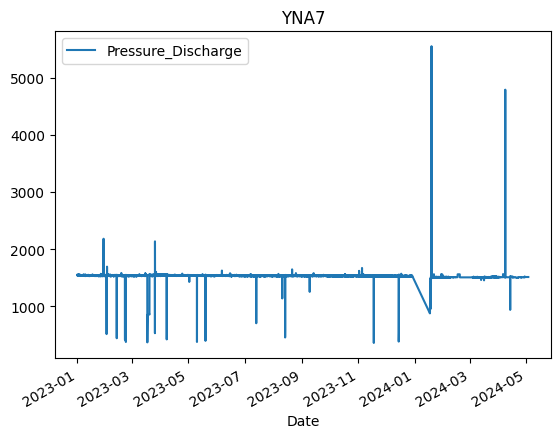

<Figure size 640x480 with 0 Axes>

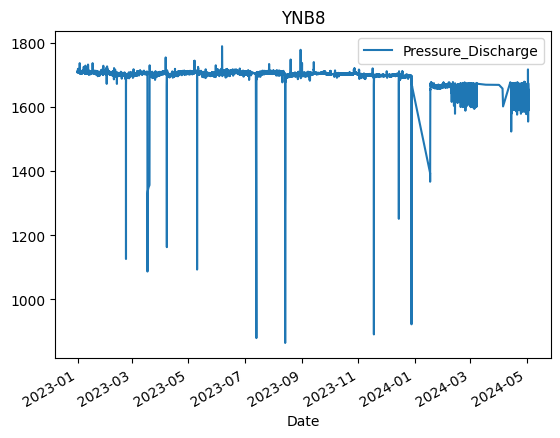

<Figure size 640x480 with 0 Axes>

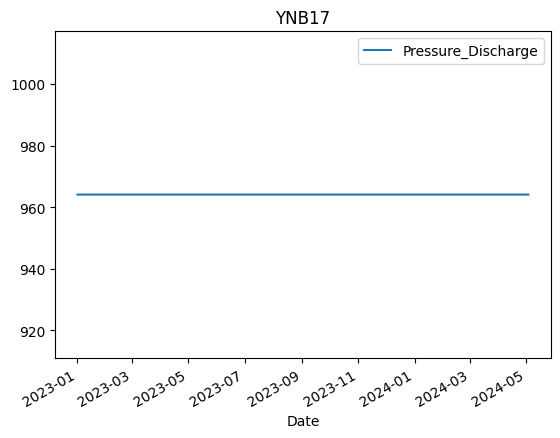

<Figure size 640x480 with 0 Axes>

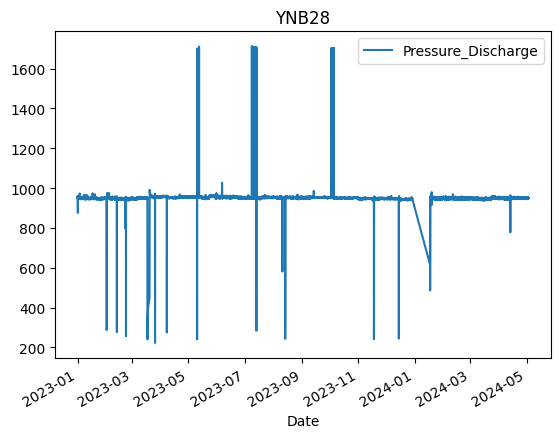

<Figure size 640x480 with 0 Axes>

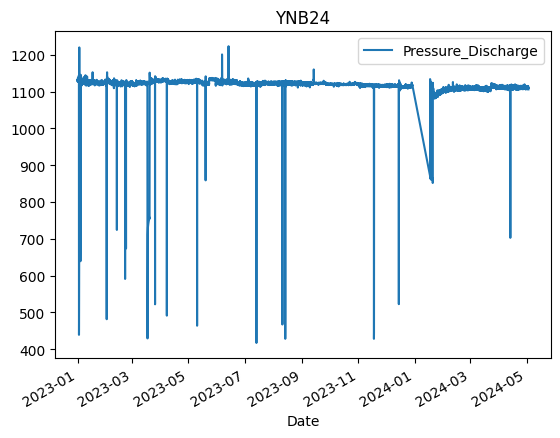

<Figure size 640x480 with 0 Axes>

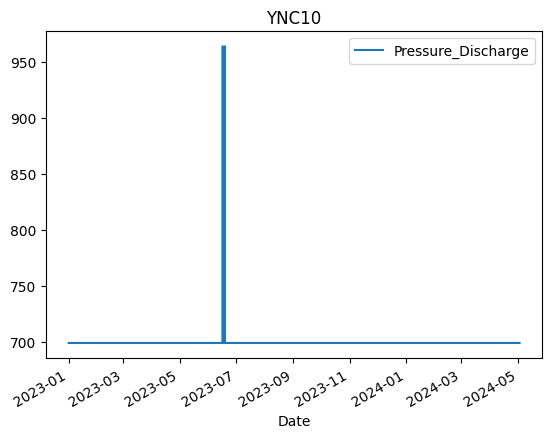

<Figure size 640x480 with 0 Axes>

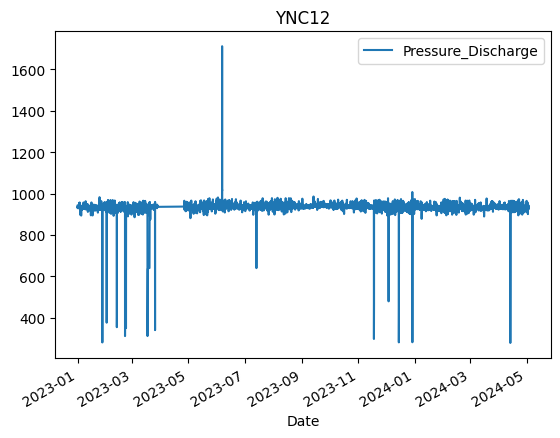

<Figure size 640x480 with 0 Axes>

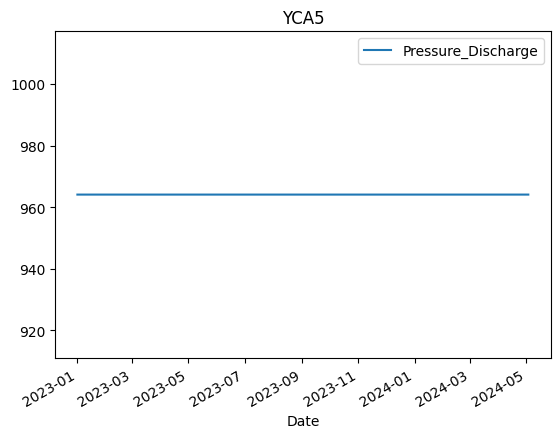

<Figure size 640x480 with 0 Axes>

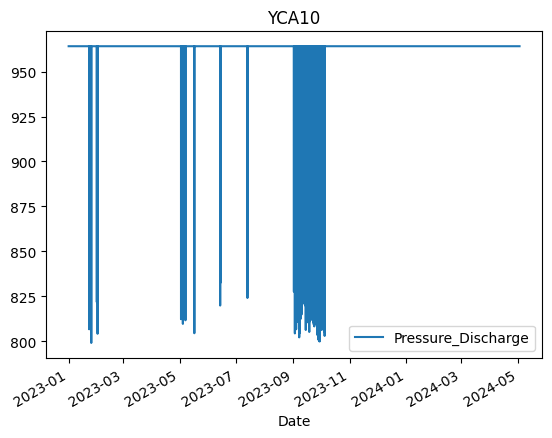

<Figure size 640x480 with 0 Axes>

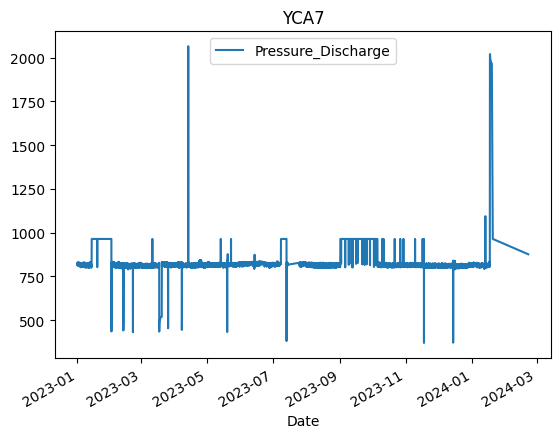

<Figure size 640x480 with 0 Axes>

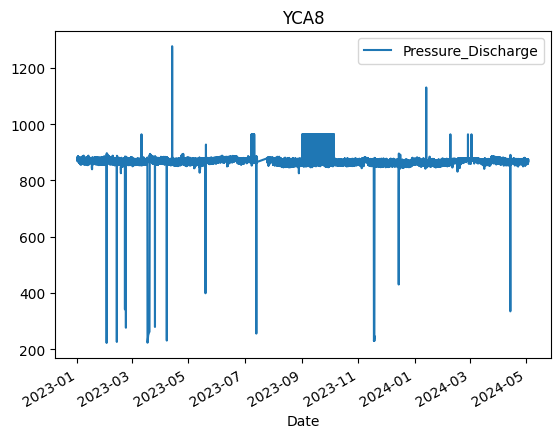

<Figure size 640x480 with 0 Axes>

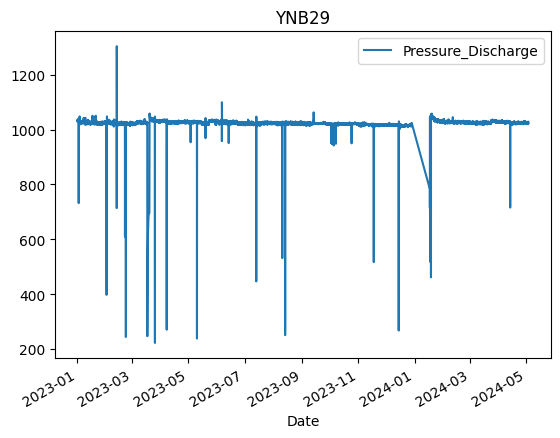

<Figure size 640x480 with 0 Axes>

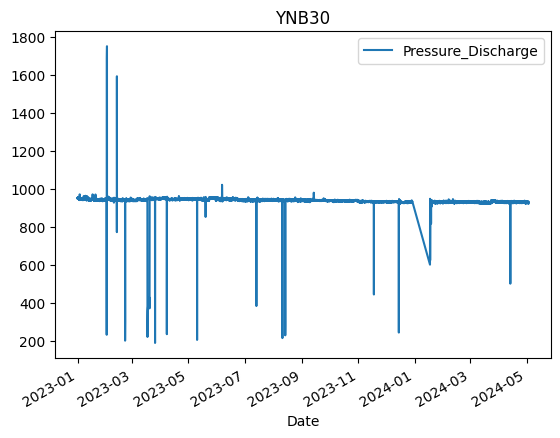

<Figure size 640x480 with 0 Axes>

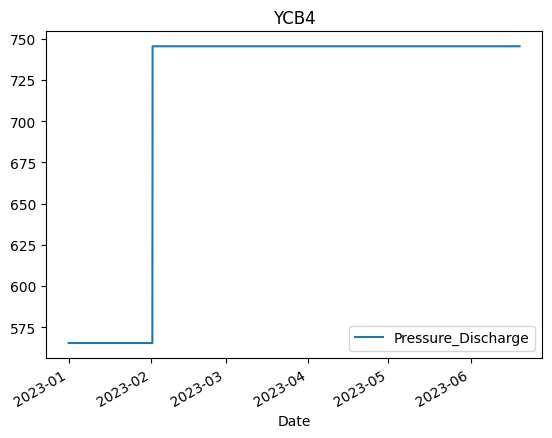

<Figure size 640x480 with 0 Axes>

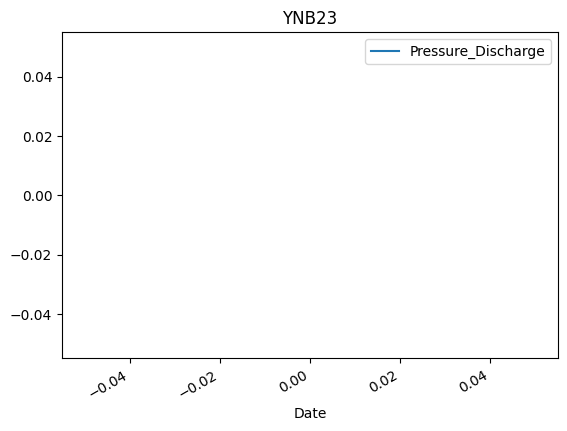

<Figure size 640x480 with 0 Axes>

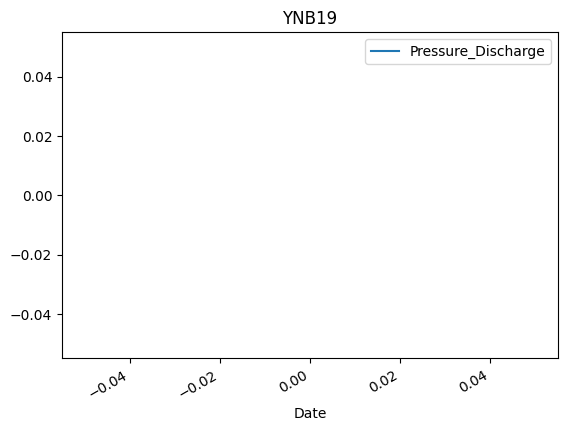

<Figure size 640x480 with 0 Axes>

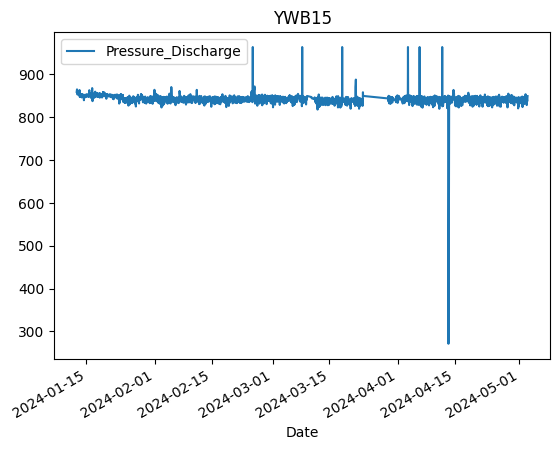

<Figure size 640x480 with 0 Axes>

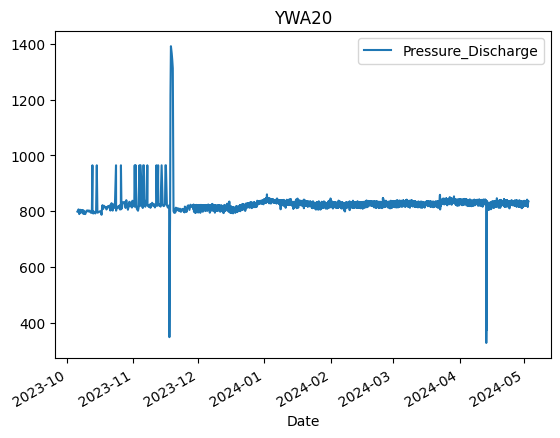

<Figure size 640x480 with 0 Axes>

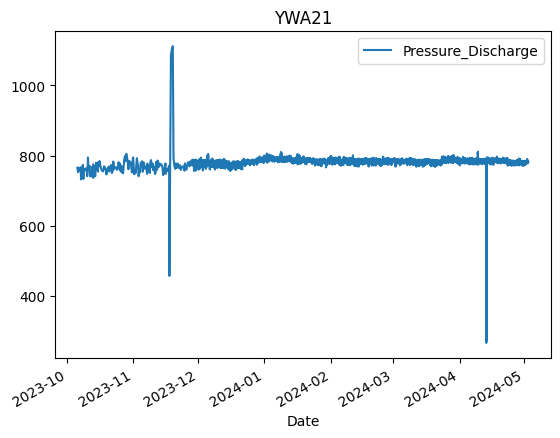

<Figure size 640x480 with 0 Axes>

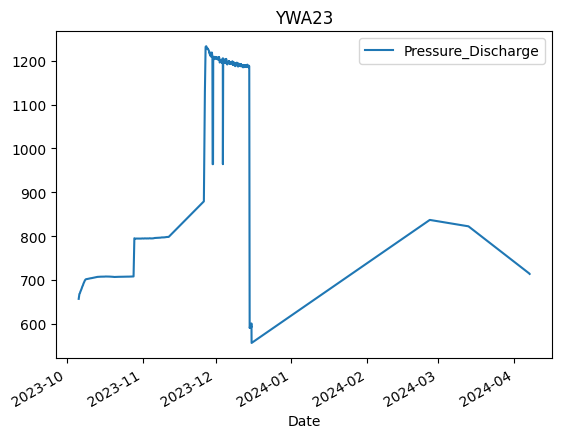

<Figure size 640x480 with 0 Axes>

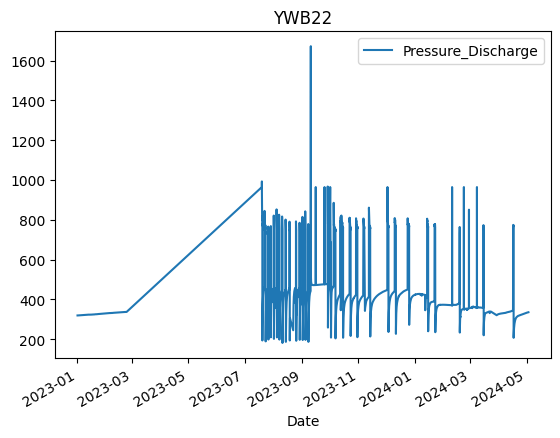

<Figure size 640x480 with 0 Axes>

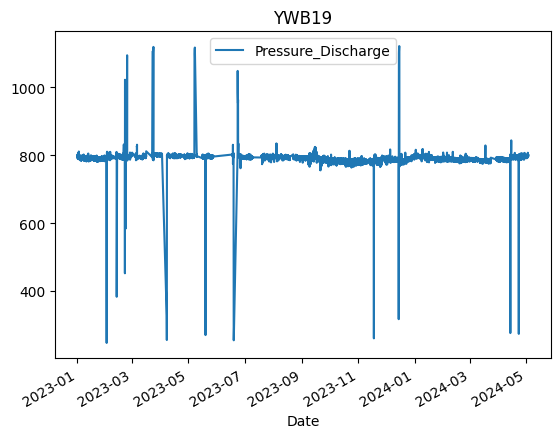

<Figure size 640x480 with 0 Axes>

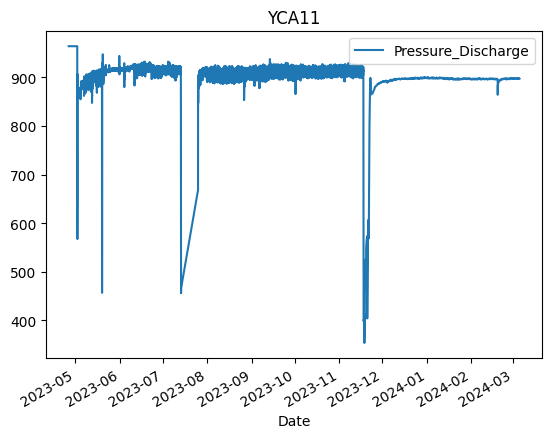

<Figure size 640x480 with 0 Axes>

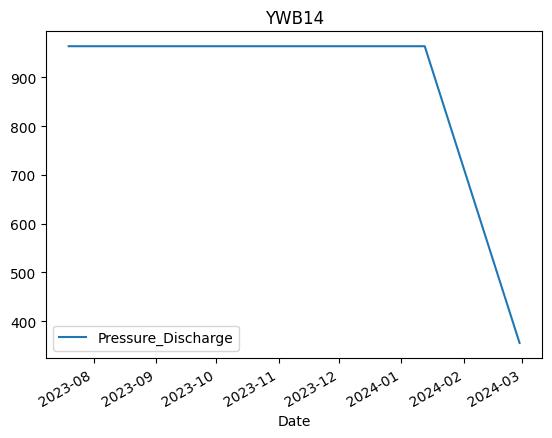

<Figure size 640x480 with 0 Axes>

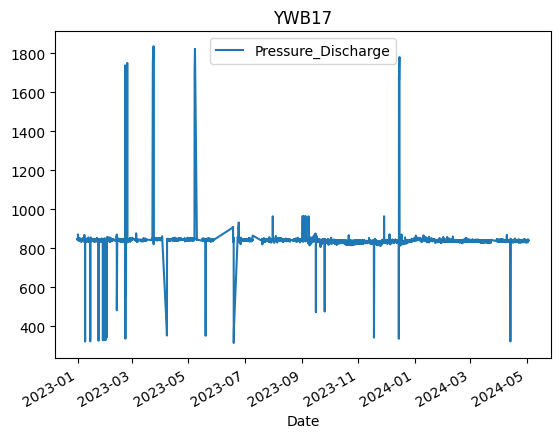

<Figure size 640x480 with 0 Axes>

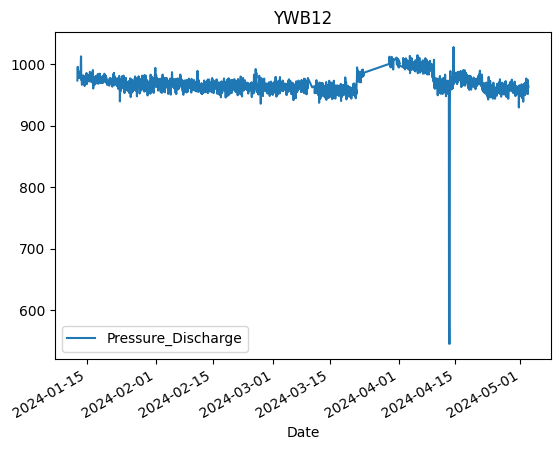

In [201]:
plot_pressure_discharge(df2,dict_data_tab0)

In [202]:
def plot_temp_intake(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Temp_Intake')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

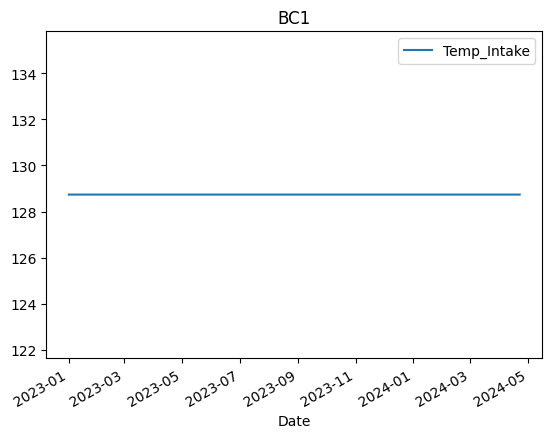

<Figure size 640x480 with 0 Axes>

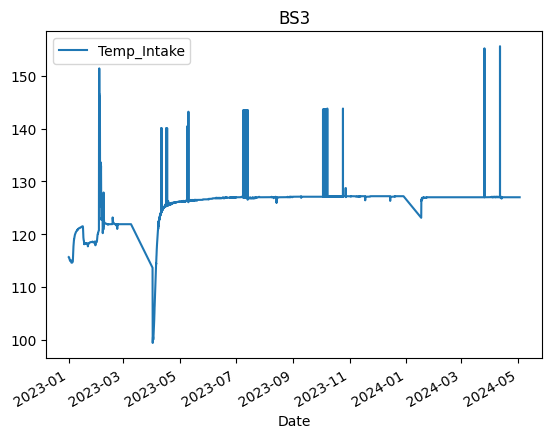

<Figure size 640x480 with 0 Axes>

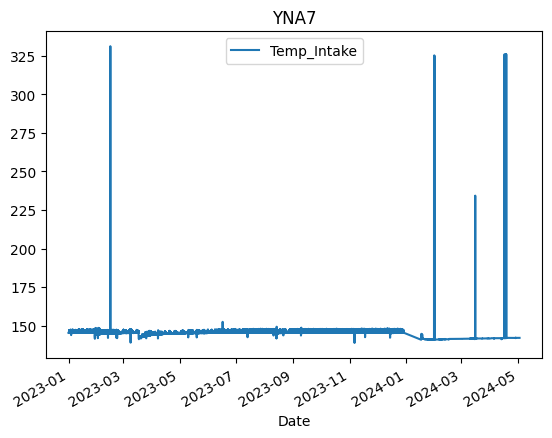

<Figure size 640x480 with 0 Axes>

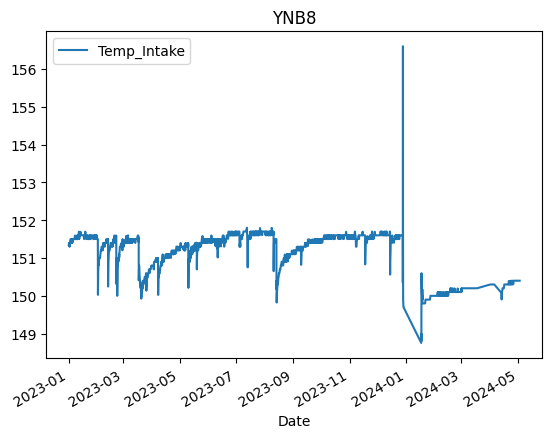

<Figure size 640x480 with 0 Axes>

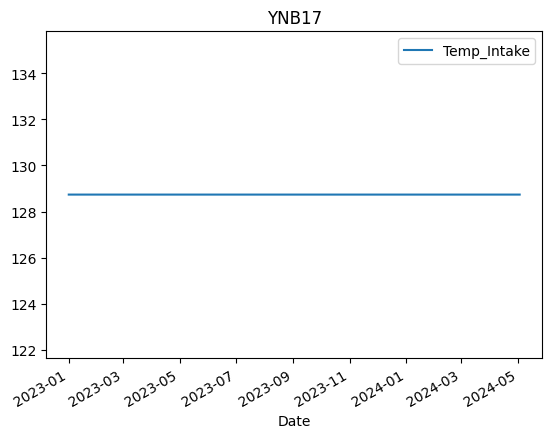

<Figure size 640x480 with 0 Axes>

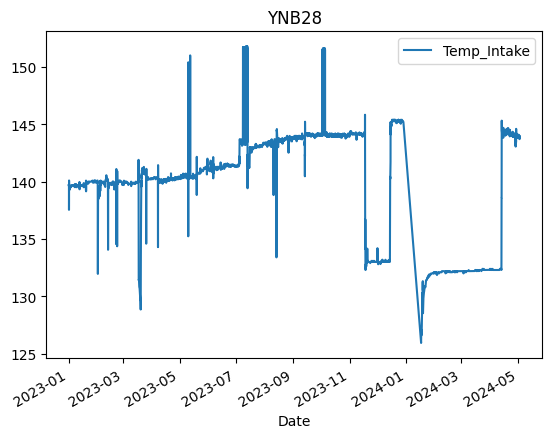

<Figure size 640x480 with 0 Axes>

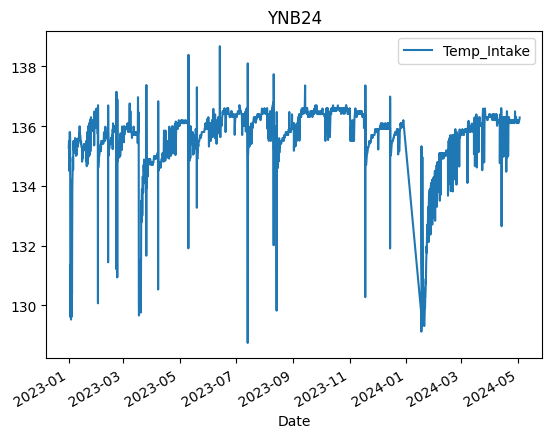

<Figure size 640x480 with 0 Axes>

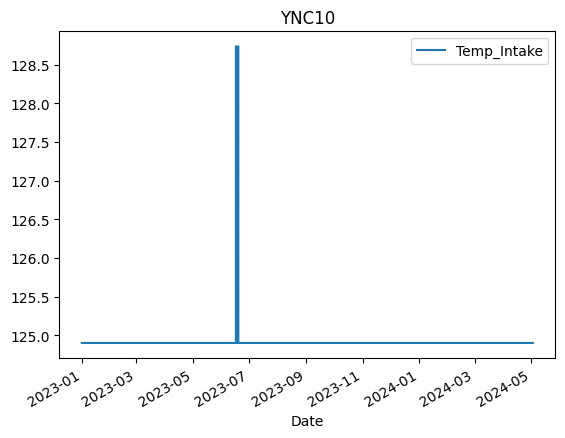

<Figure size 640x480 with 0 Axes>

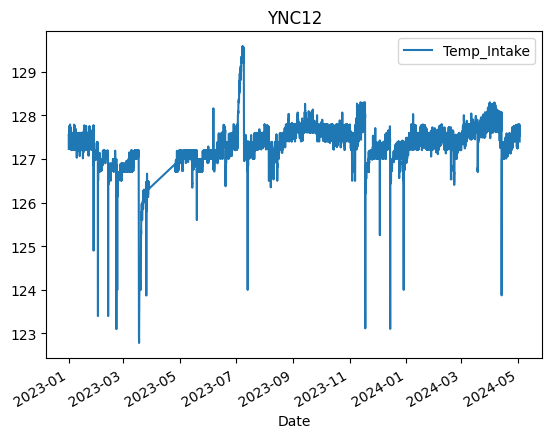

<Figure size 640x480 with 0 Axes>

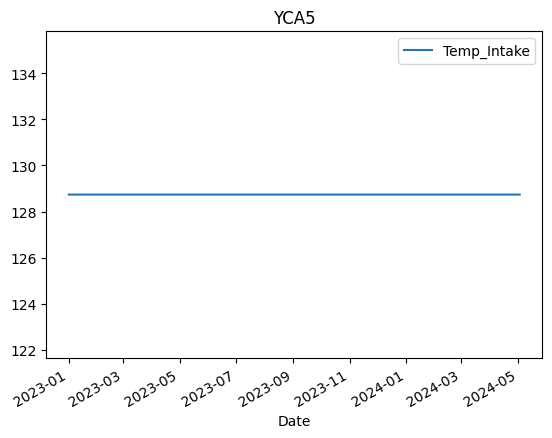

<Figure size 640x480 with 0 Axes>

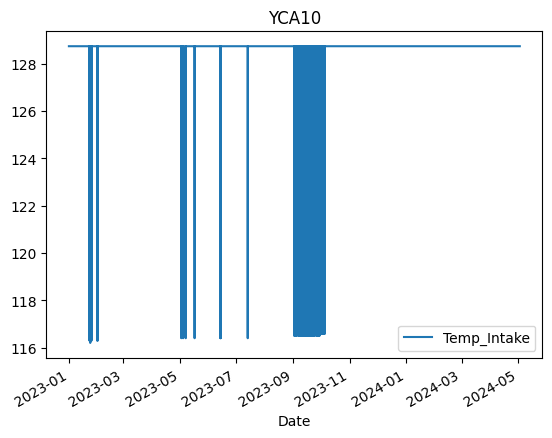

<Figure size 640x480 with 0 Axes>

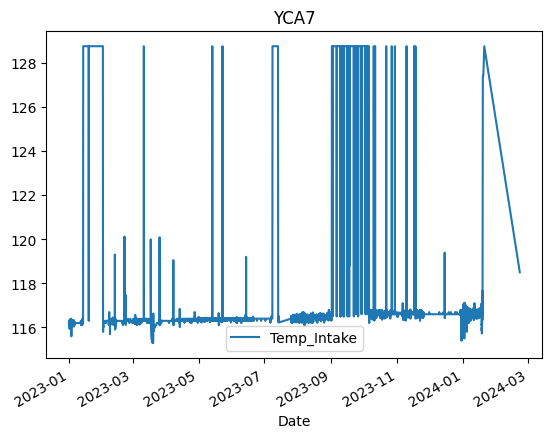

<Figure size 640x480 with 0 Axes>

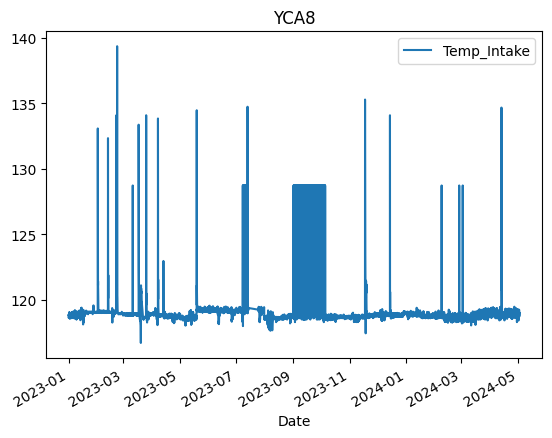

<Figure size 640x480 with 0 Axes>

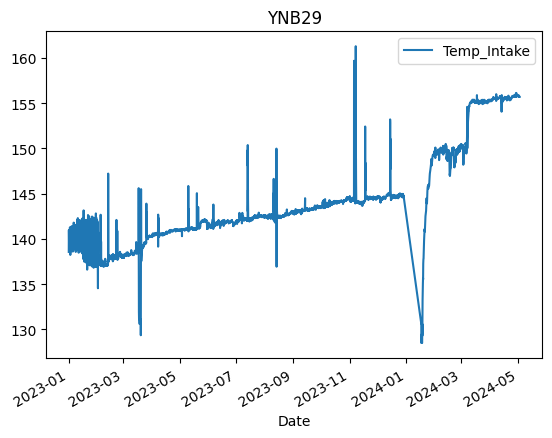

<Figure size 640x480 with 0 Axes>

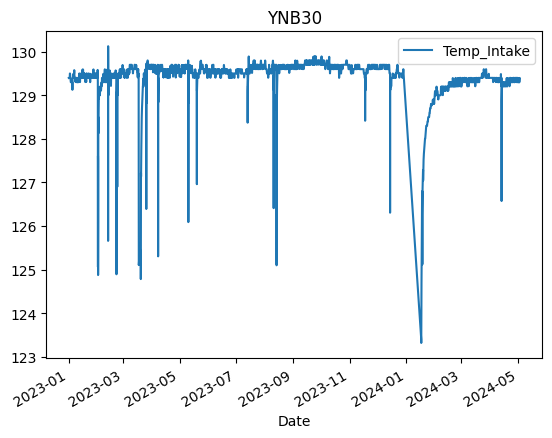

<Figure size 640x480 with 0 Axes>

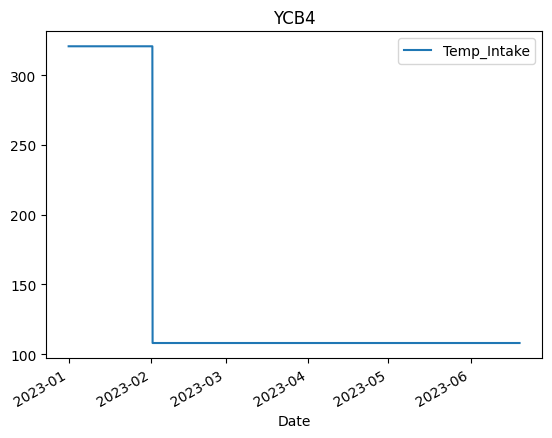

<Figure size 640x480 with 0 Axes>

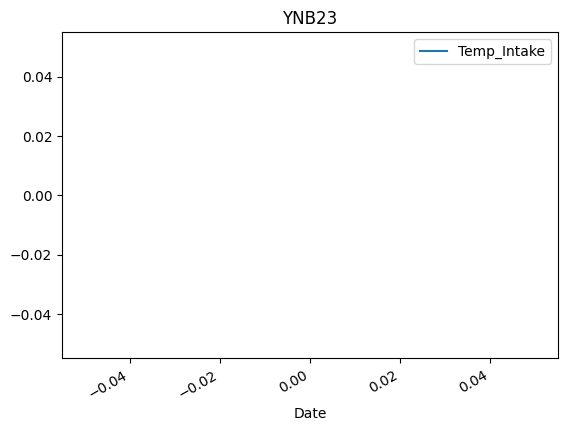

<Figure size 640x480 with 0 Axes>

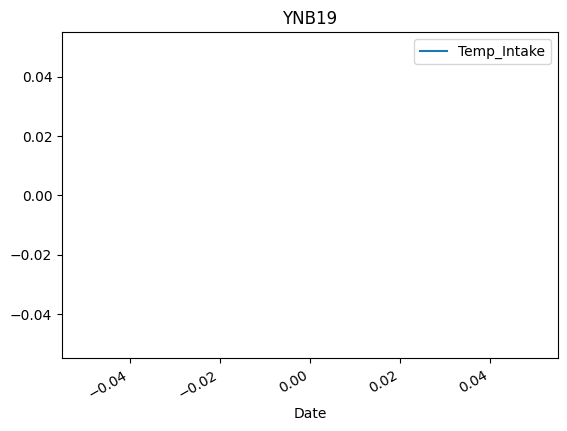

<Figure size 640x480 with 0 Axes>

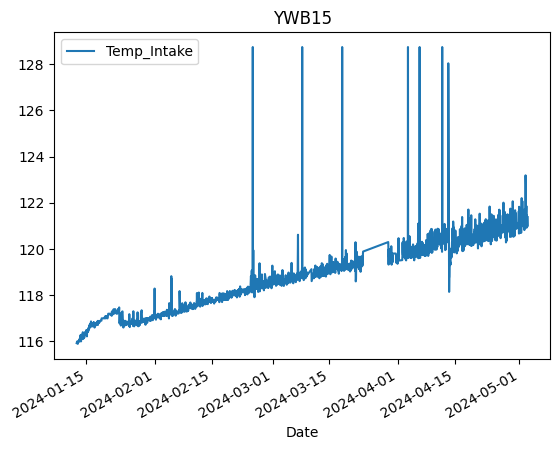

<Figure size 640x480 with 0 Axes>

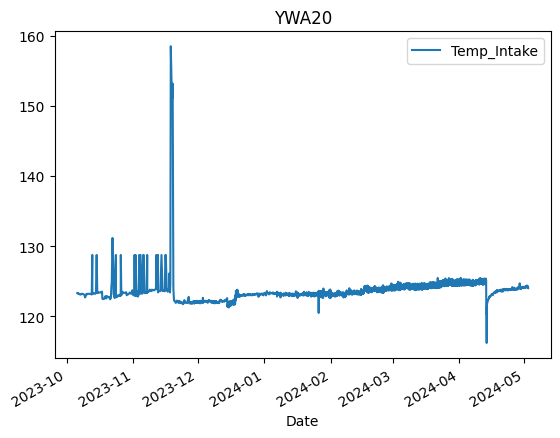

<Figure size 640x480 with 0 Axes>

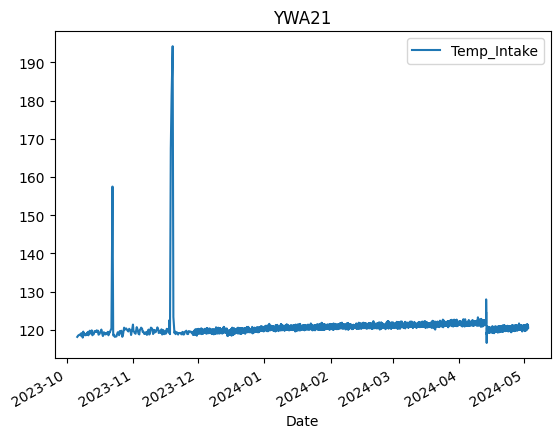

<Figure size 640x480 with 0 Axes>

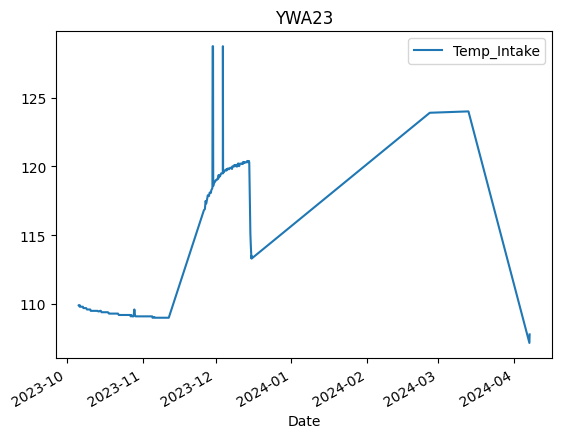

<Figure size 640x480 with 0 Axes>

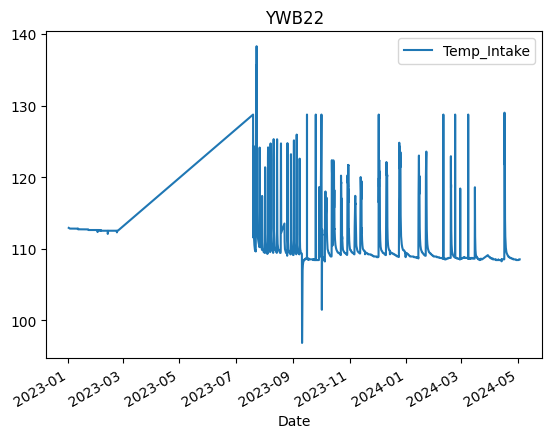

<Figure size 640x480 with 0 Axes>

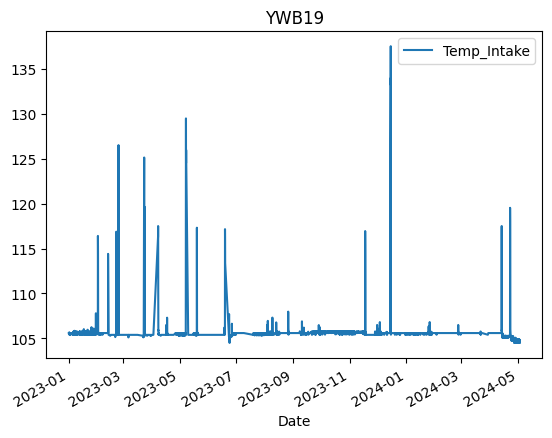

<Figure size 640x480 with 0 Axes>

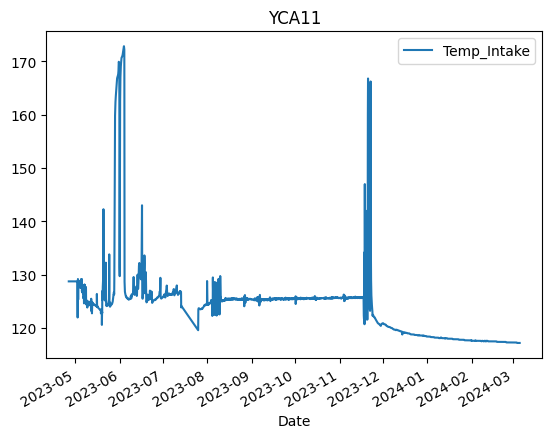

<Figure size 640x480 with 0 Axes>

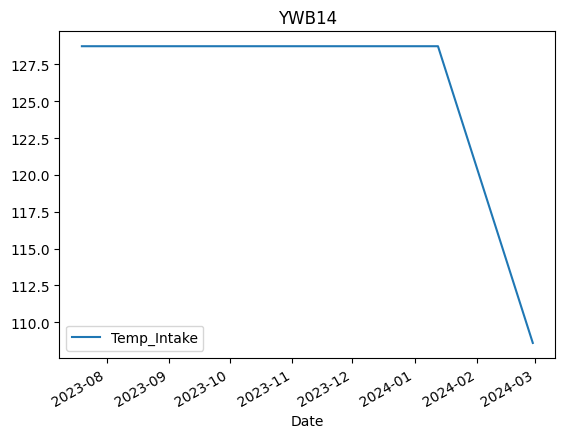

<Figure size 640x480 with 0 Axes>

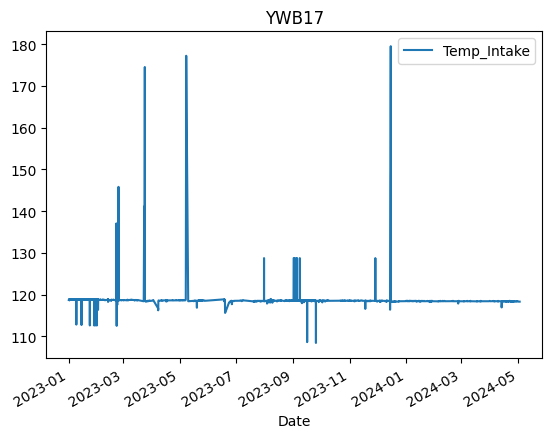

<Figure size 640x480 with 0 Axes>

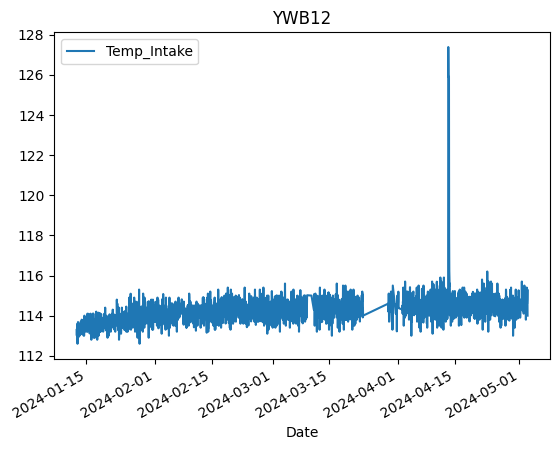

In [203]:
plot_temp_intake(df2,dict_data_tab0)

In [204]:
def plot_temp_motor(df2,dict_data_tab0):
    for key in dict_data_tab0:
        plt.figure()
        df2[df2['Well_ID']==key].plot(x='Date',y='Temp_Motor')
        plt.title(key)
        plt.show()

<Figure size 640x480 with 0 Axes>

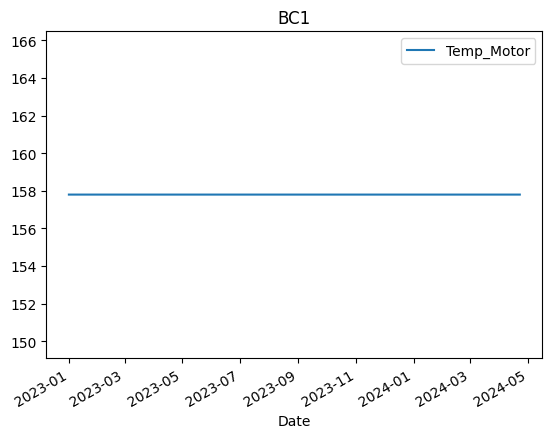

<Figure size 640x480 with 0 Axes>

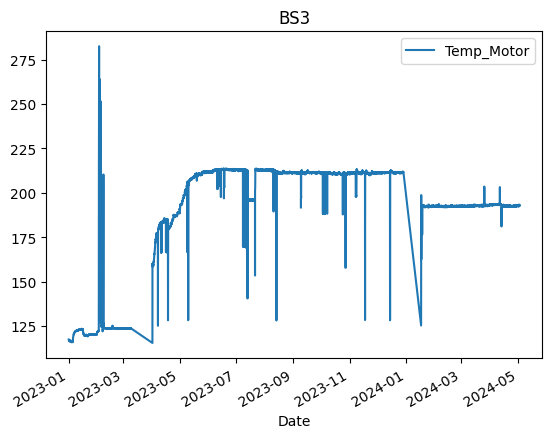

<Figure size 640x480 with 0 Axes>

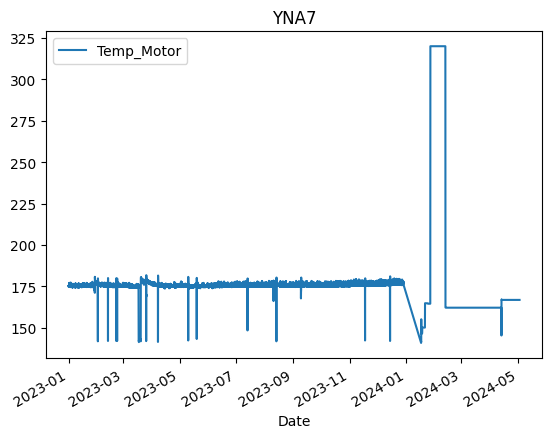

<Figure size 640x480 with 0 Axes>

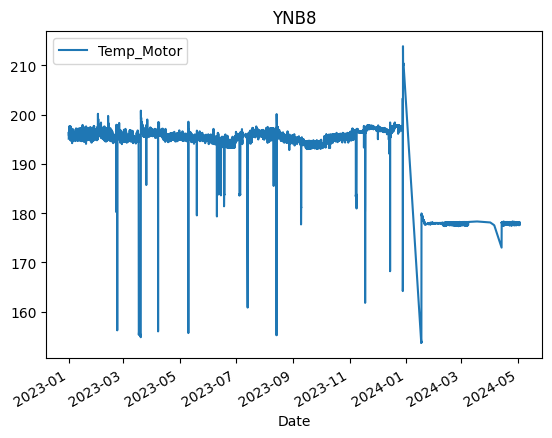

<Figure size 640x480 with 0 Axes>

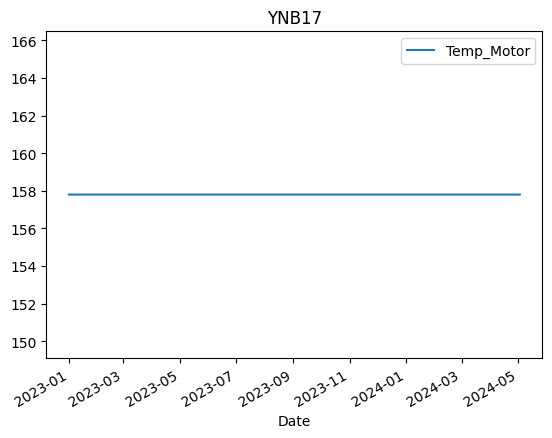

<Figure size 640x480 with 0 Axes>

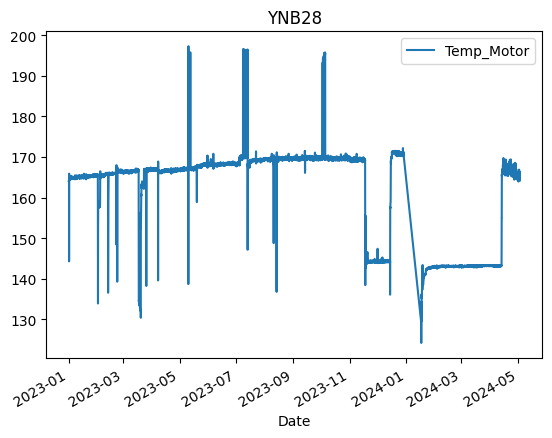

<Figure size 640x480 with 0 Axes>

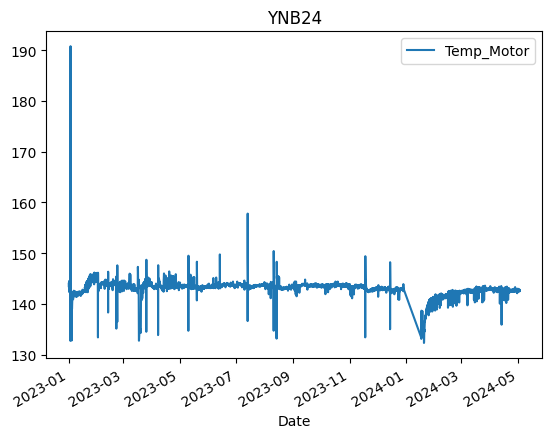

<Figure size 640x480 with 0 Axes>

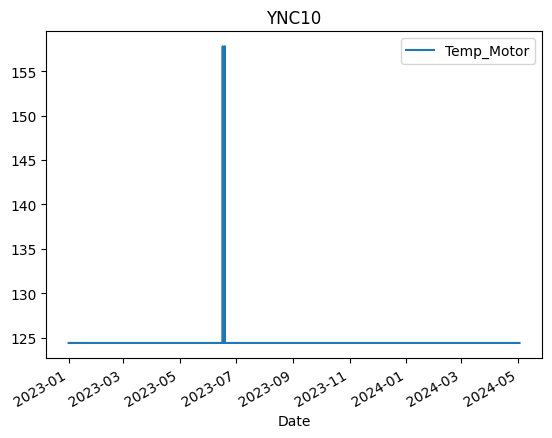

<Figure size 640x480 with 0 Axes>

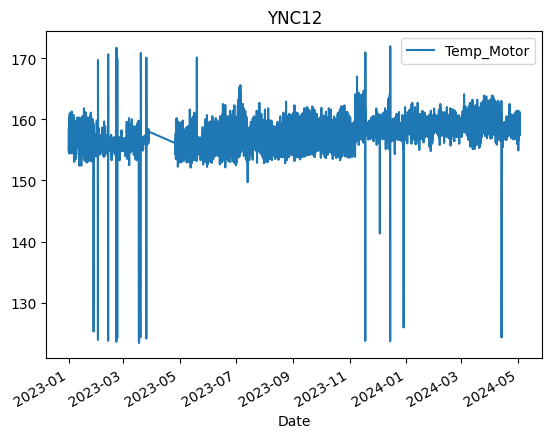

<Figure size 640x480 with 0 Axes>

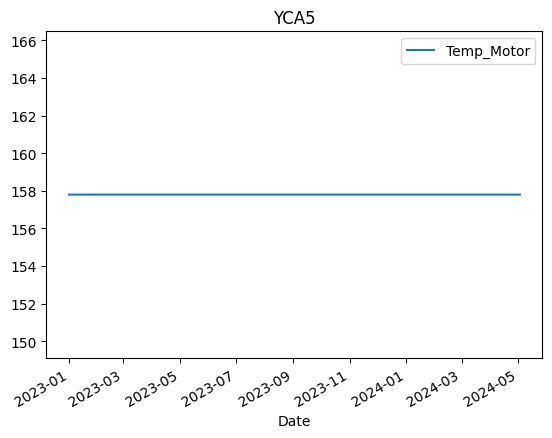

<Figure size 640x480 with 0 Axes>

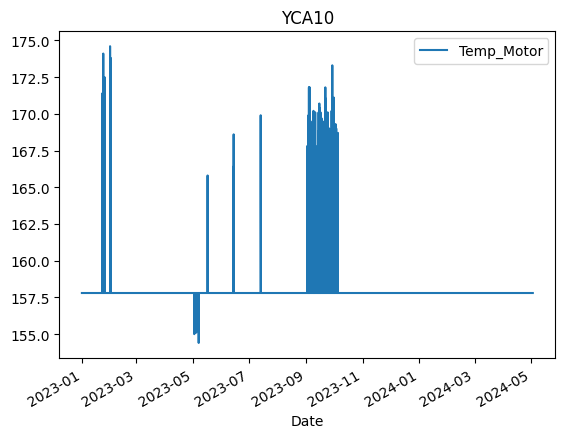

<Figure size 640x480 with 0 Axes>

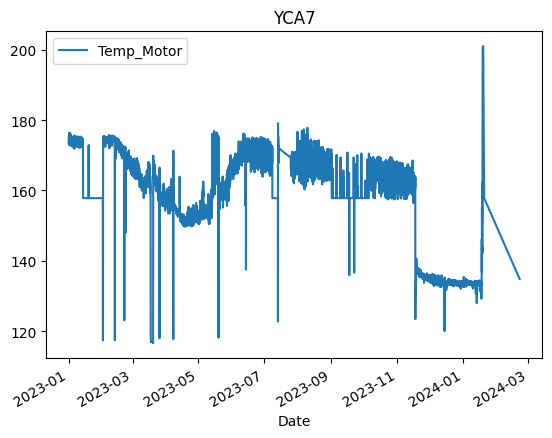

<Figure size 640x480 with 0 Axes>

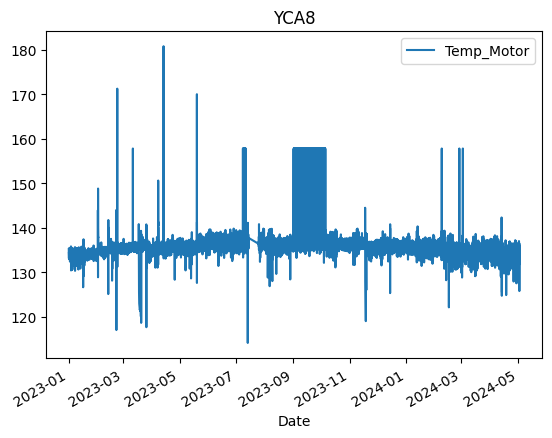

<Figure size 640x480 with 0 Axes>

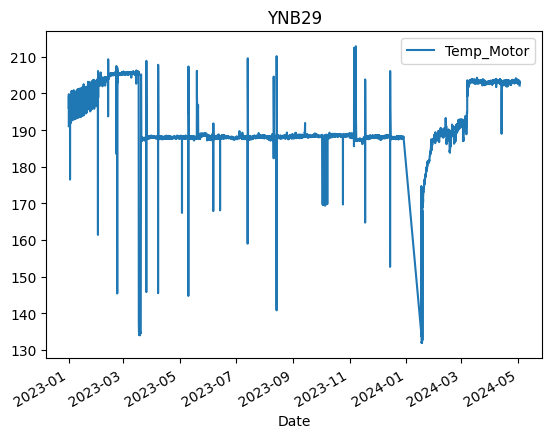

<Figure size 640x480 with 0 Axes>

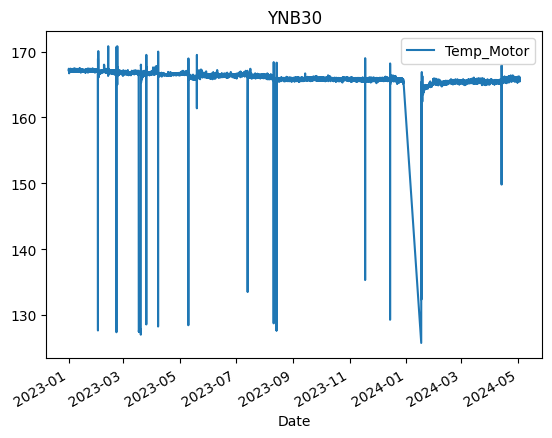

<Figure size 640x480 with 0 Axes>

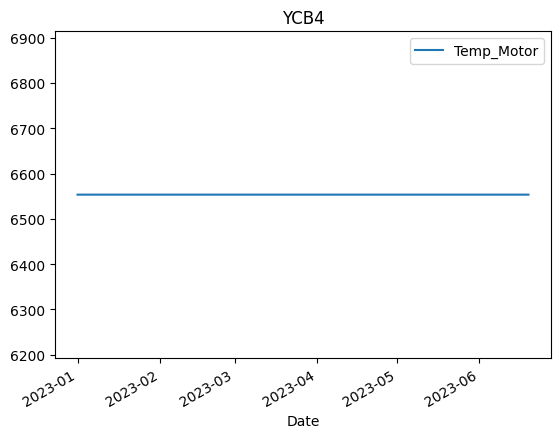

<Figure size 640x480 with 0 Axes>

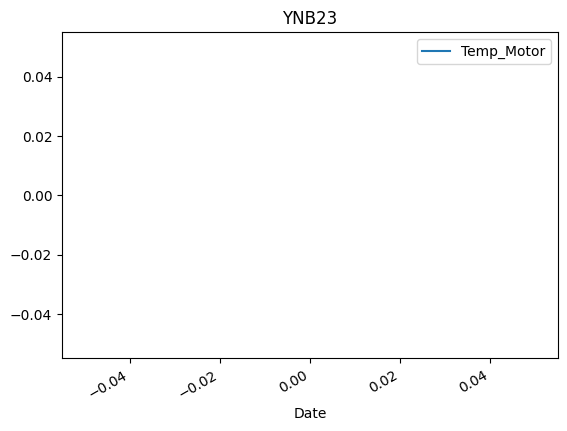

<Figure size 640x480 with 0 Axes>

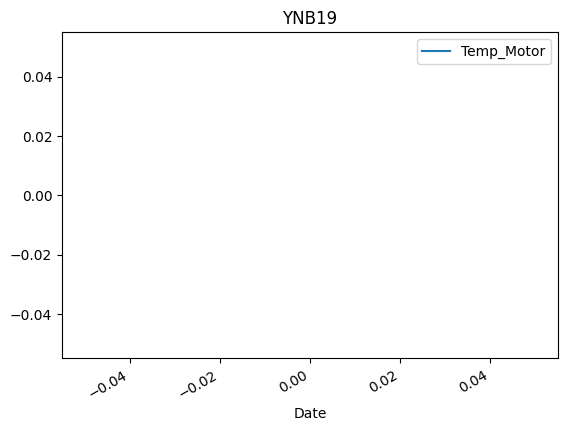

<Figure size 640x480 with 0 Axes>

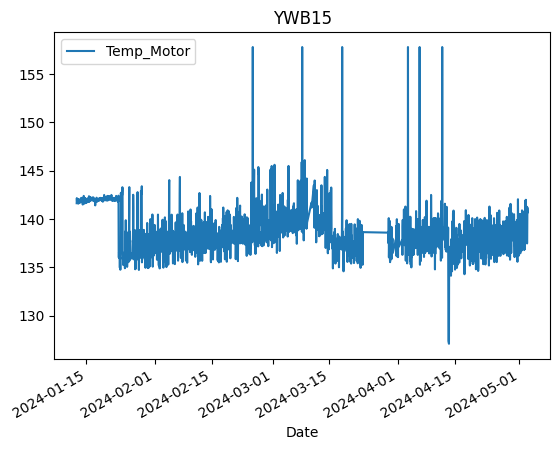

<Figure size 640x480 with 0 Axes>

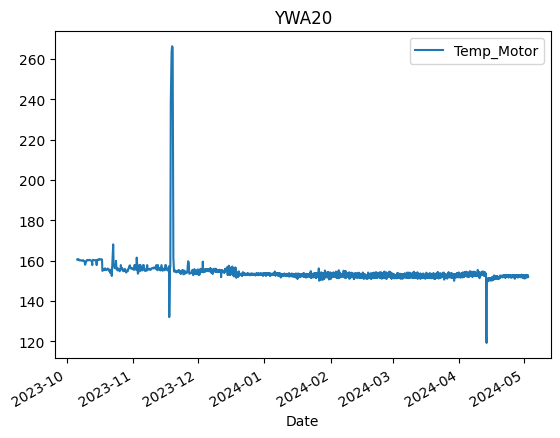

<Figure size 640x480 with 0 Axes>

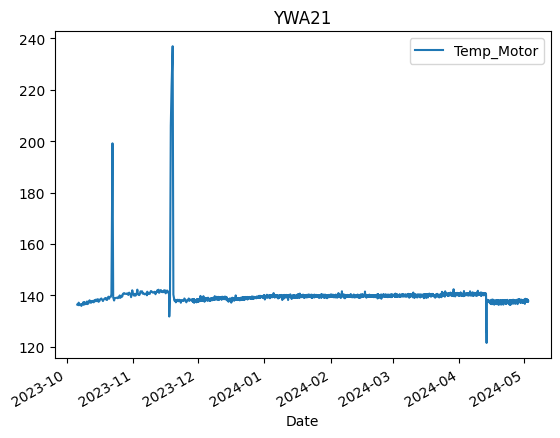

<Figure size 640x480 with 0 Axes>

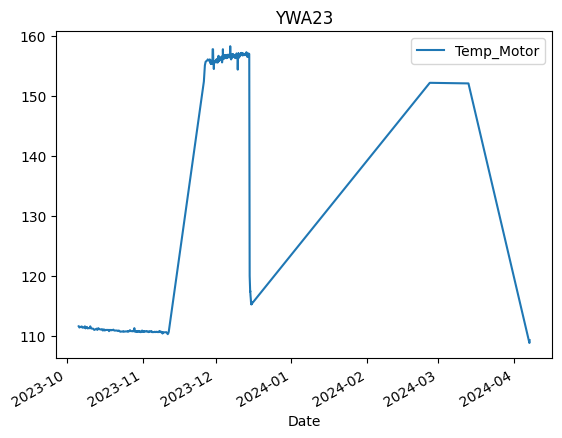

<Figure size 640x480 with 0 Axes>

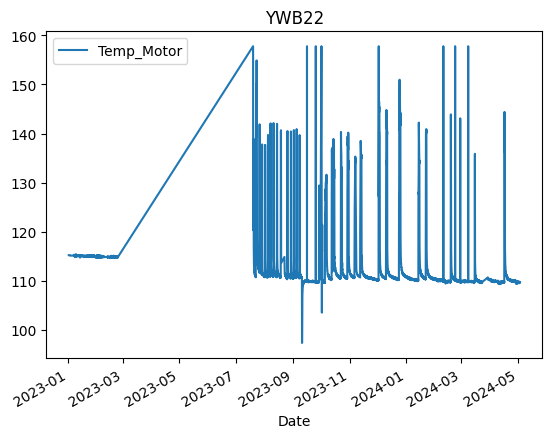

<Figure size 640x480 with 0 Axes>

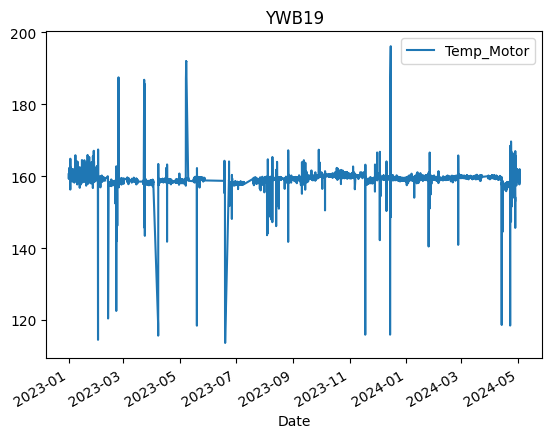

<Figure size 640x480 with 0 Axes>

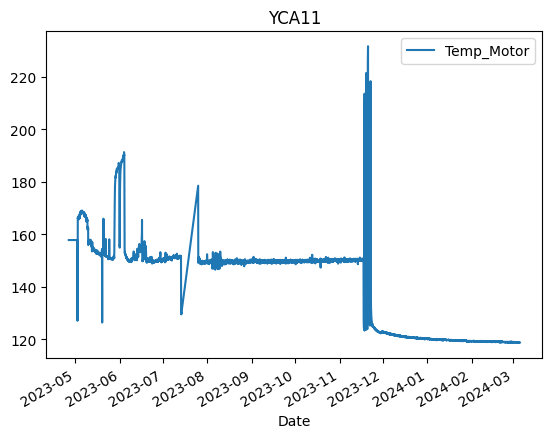

<Figure size 640x480 with 0 Axes>

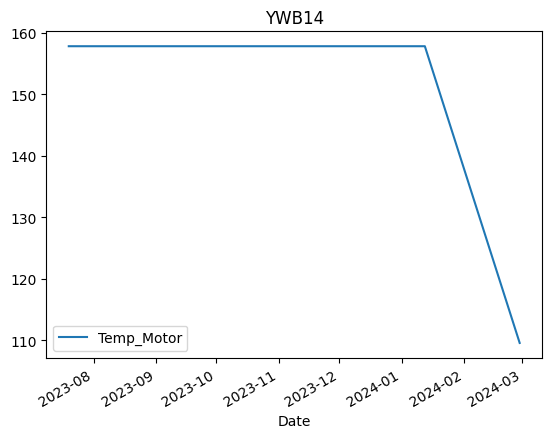

<Figure size 640x480 with 0 Axes>

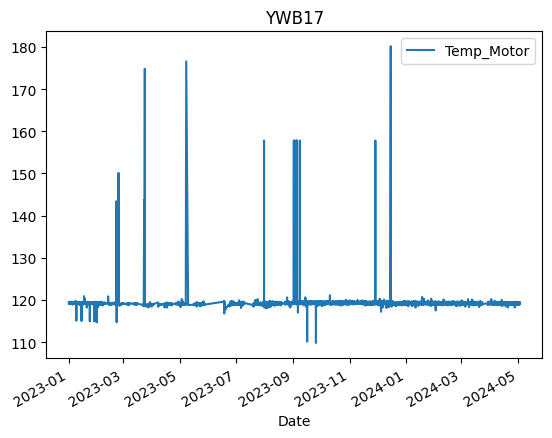

<Figure size 640x480 with 0 Axes>

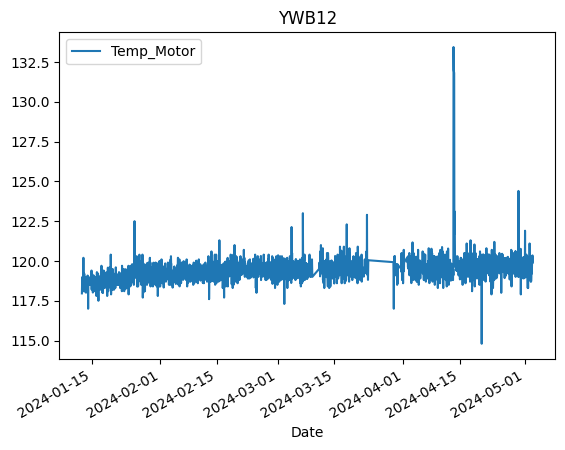

In [205]:
plot_temp_motor(df2,dict_data_tab0)